In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

In [3]:
# Load the data
df_2018 = pd.read_csv('boston_crime_2018.csv')
df_2020 = pd.read_csv('boston_crime_2020.csv', low_memory=False)
df_2022 = pd.read_csv('boston_crime_2022.csv', low_memory=False)

df_2018

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192074715,2629,Harassment,HARASSMENT,B2,278,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Two,HARRISON AVE,42.331538,-71.080157,"(42.33153805, -71.08015661)"
1,I192068538,1107,Fraud,FRAUD - IMPERSONATION,D14,794,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Two,GLENVILLE AVE,42.349780,-71.134230,"(42.34977988, -71.13423049)"
2,I192005657,2610,Other,TRESPASSING,C11,396,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Two,MELBOURNE ST,42.291093,-71.065945,"(42.29109287, -71.06594539)"
3,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"
4,I192013179,619,Larceny,LARCENY ALL OTHERS,C11,360,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part One,CENTERVALE PARK,42.296323,-71.063569,"(42.29632282, -71.06356881)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98883,I182105272,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,E18,555,NaN,2018-12-31 23:26:00,2018,12,Monday,23,Part Three,POPLAR ST,42.277147,-71.125124,"(42.27714676, -71.12512415)"
98884,I192000256,1402,Vandalism,VANDALISM,E5,564,NaN,2018-12-31 23:30:00,2018,12,Monday,23,Part Two,WASHINGTON ST,42.294217,-71.119853,"(42.29421690, -71.11985262)"
98885,I192000003,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,D14,773,NaN,2018-12-31 23:38:00,2018,12,Monday,23,Part Three,KIRKWOOD RD,42.341269,-71.157506,"(42.34126852, -71.15750565)"
98886,I192000002,3114,Investigate Property,INVESTIGATE PROPERTY,D4,620,NaN,2018-12-31 23:41:00,2018,12,Monday,23,Part Three,BOYLSTON ST,42.347102,-71.088417,"(42.34710196, -71.08841746)"


In [4]:
# Create a dictionary from 2018 data
code_group_dict = pd.Series(df_2018.OFFENSE_CODE_GROUP.values,index=df_2018.OFFENSE_CODE).to_dict()

# Fill 2020 and 2022 data
df_2020['OFFENSE_CODE_GROUP'] = df_2020['OFFENSE_CODE'].map(code_group_dict)
df_2022['OFFENSE_CODE_GROUP'] = df_2022['OFFENSE_CODE'].map(code_group_dict)

# Concatenate the dataframes
df = pd.concat([df_2018, df_2020, df_2022])

In [5]:
# In 2018, 'SHOOTING' column is completely missing, so we'll add a column with default value
df_2018['SHOOTING'] = np.nan

In [6]:
df_2018

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192074715,2629,Harassment,HARASSMENT,B2,278,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Two,HARRISON AVE,42.331538,-71.080157,"(42.33153805, -71.08015661)"
1,I192068538,1107,Fraud,FRAUD - IMPERSONATION,D14,794,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Two,GLENVILLE AVE,42.349780,-71.134230,"(42.34977988, -71.13423049)"
2,I192005657,2610,Other,TRESPASSING,C11,396,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Two,MELBOURNE ST,42.291093,-71.065945,"(42.29109287, -71.06594539)"
3,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"
4,I192013179,619,Larceny,LARCENY ALL OTHERS,C11,360,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part One,CENTERVALE PARK,42.296323,-71.063569,"(42.29632282, -71.06356881)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98883,I182105272,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,E18,555,NaN,2018-12-31 23:26:00,2018,12,Monday,23,Part Three,POPLAR ST,42.277147,-71.125124,"(42.27714676, -71.12512415)"
98884,I192000256,1402,Vandalism,VANDALISM,E5,564,NaN,2018-12-31 23:30:00,2018,12,Monday,23,Part Two,WASHINGTON ST,42.294217,-71.119853,"(42.29421690, -71.11985262)"
98885,I192000003,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,D14,773,NaN,2018-12-31 23:38:00,2018,12,Monday,23,Part Three,KIRKWOOD RD,42.341269,-71.157506,"(42.34126852, -71.15750565)"
98886,I192000002,3114,Investigate Property,INVESTIGATE PROPERTY,D4,620,NaN,2018-12-31 23:41:00,2018,12,Monday,23,Part Three,BOYLSTON ST,42.347102,-71.088417,"(42.34710196, -71.08841746)"


In [7]:
df_2020

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,212012996,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,B2,259,0,2020-01-01 00:00:00,2020,1,Wednesday,0,NaN,ALEXANDER ST,42.316942,-71.069912,"(42.3169424347871, -71.0699121273113)"
1,212008096,1107,Fraud,FRAUD - IMPERSONATION,A1,118,0,2020-01-01 00:00:00,2020,1,Wednesday,0,NaN,BOYLSTON ST,42.352418,-71.065255,"(42.3524181472861, -71.0652549858121)"
2,202000034,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,C6,201,0,2020-01-01 00:00:00,2020,1,Wednesday,0,NaN,W BROADWAY,42.340070,-71.052794,"(42.340069862647, -71.0527942008028)"
3,202007210,1001,Counterfeiting,FORGERY / COUNTERFEITING,C6,200,0,2020-01-01 00:00:00,2020,1,Wednesday,0,NaN,ORTON-MAROTTA WAY,42.341288,-71.054679,"(42.3412875043904, -71.054679326494)"
4,202000355,617,Larceny,LARCENY THEFT FROM BUILDING,A1,77,0,2020-01-01 00:00:00,2020,1,Wednesday,0,NaN,FRIEND ST,42.361839,-71.059765,"(42.3618385665647, -71.0597648909416)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70889,202095668,3802,Motor Vehicle Accident Response,M/V ACCIDENT - PROPERTY DAMAGE,B2,257,0,2020-12-31 22:59:00,2020,12,Thursday,22,NaN,STOUGHTON ST,42.316617,-71.064078,"(42.3166174973565, -71.0640782725732)"
70890,202095647,1402,Vandalism,VANDALISM,B3,454,0,2020-12-31 23:04:00,2020,12,Thursday,23,NaN,RIPLEY RD,42.299263,-71.076265,"(42.2992630326008, -71.0762651335127)"
70891,212000339,801,Simple Assault,ASSAULT - SIMPLE,A1,77,0,2020-12-31 23:40:00,2020,12,Thursday,23,NaN,BROAD ST,42.361839,-71.059765,"(42.3618385665647, -71.0597648909416)"
70892,212000004,3115,Investigate Person,INVESTIGATE PERSON,C6,207,0,2020-12-31 23:40:00,2020,12,Thursday,23,NaN,PIER 4 BLVD,NaN,NaN,NaN


In [8]:
df_2022

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,222076257,619,Larceny,LARCENY ALL OTHERS,D4,167,0,2022-01-01 00:00:00,2022,1,Saturday,0,NaN,HARRISON AVE,42.339542,-71.069409,"(42.33954198983014, -71.06940876967543)"
1,222053099,2670,Criminal Harassment,HARASSMENT/ CRIMINAL HARASSMENT,A7,,0,2022-01-01 00:00:00,2022,1,Saturday,0,NaN,BENNINGTON ST,42.377246,-71.032597,"(42.37724638479816, -71.0325970804128)"
2,222039411,3201,Property Lost,PROPERTY - LOST/ MISSING,D14,778,0,2022-01-01 00:00:00,2022,1,Saturday,0,NaN,WASHINGTON ST,42.349056,-71.150498,"(42.34905600030506, -71.15049849975023)"
3,222011090,3201,Property Lost,PROPERTY - LOST/ MISSING,B3,465,0,2022-01-01 00:00:00,2022,1,Saturday,0,NaN,BLUE HILL AVE,42.284826,-71.091374,"(42.28482576580488, -71.09137368938802)"
4,222062685,3201,Property Lost,PROPERTY - LOST/ MISSING,B3,465,0,2022-01-01 00:00:00,2022,1,Saturday,0,NaN,BLUE HILL AVE,42.284826,-71.091374,"(42.28482576580488, -71.09137368938802)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73847,232000091,1402,Vandalism,VANDALISM,A1,66,0,2022-12-31 23:30:00,2022,12,Saturday,23,NaN,CHARLES ST,42.359790,-71.070782,"(42.35979037458775, -71.07078234449541)"
73848,232000002,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,C11,,0,2022-12-31 23:37:00,2022,12,Saturday,23,NaN,COLUMBIA RD,42.319593,-71.062607,"(42.31959298334654, -71.06260699634272)"
73849,232000140,619,Larceny,LARCENY ALL OTHERS,D14,778,0,2022-12-31 23:45:00,2022,12,Saturday,23,NaN,WASHINGTON ST,42.349056,-71.150498,"(42.34905600030506, -71.15049849975023)"
73850,232000315,3201,Property Lost,PROPERTY - LOST/ MISSING,D4,167,0,2022-12-31 23:50:00,2022,12,Saturday,23,NaN,HARRISON AVENUE,NaN,NaN,NaN


Number of crimes per year: This should preferably be a bar chart since we have discrete years.

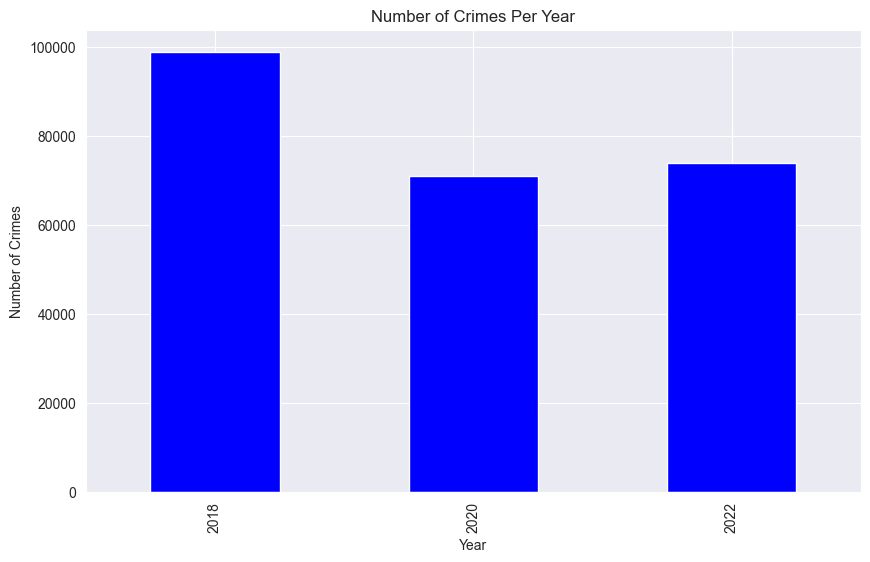

YEAR
2018    98888
2020    70894
2022    73852
Name: count, dtype: int64

In [9]:
crime_count_per_year = df['YEAR'].value_counts().sort_index()

plt.figure(figsize=(10,6))
crime_count_per_year.plot(kind='bar', color='blue')
plt.title('Number of Crimes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

crime_count_per_year

Number of crimes per month for each year: Here we can also use a stacked bar chart to represent data for each year side by side.

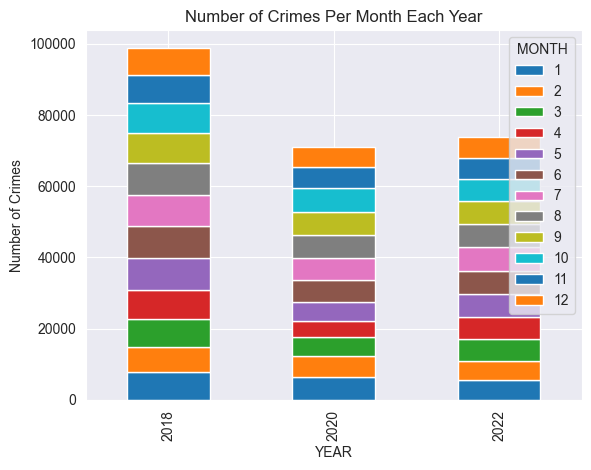

MONTH    1     2     3     4     5     6     7     8     9     10    11    12
YEAR                                                                         
2018   7860  6997  7849  8004  9072  9026  8789  8871  8566  8441  7694  7719
2020   6342  5897  5513  4387  5439  5925  6236  6533  6484  6766  5770  5602
2022   5526  5418  6136  6103  6474  6500  6726  6612  6300  6235  5963  5859


In [10]:
df.groupby(['YEAR', 'MONTH']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Number of Crimes Per Month Each Year')
plt.ylabel('Number of Crimes')
plt.show()

print(df.groupby(['YEAR', 'MONTH']).size().unstack())

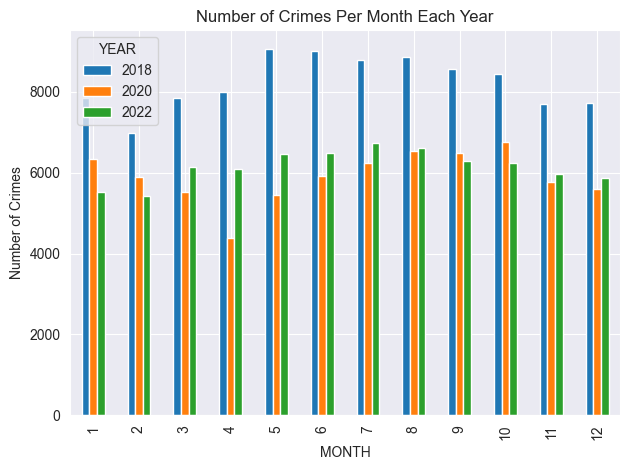

YEAR   2018  2020  2022
MONTH                  
1      7860  6342  5526
2      6997  5897  5418
3      7849  5513  6136
4      8004  4387  6103
5      9072  5439  6474
6      9026  5925  6500
7      8789  6236  6726
8      8871  6533  6612
9      8566  6484  6300
10     8441  6766  6235
11     7694  5770  5963
12     7719  5602  5859


In [11]:
df.groupby(['MONTH', 'YEAR']).size().unstack().plot(kind='bar')
plt.title('Number of Crimes Per Month Each Year')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

# Group the data and create a DataFrame
crime_count_per_month_year = df.groupby(['MONTH', 'YEAR']).size().unstack()

# Print the DataFrame
print(crime_count_per_month_year)

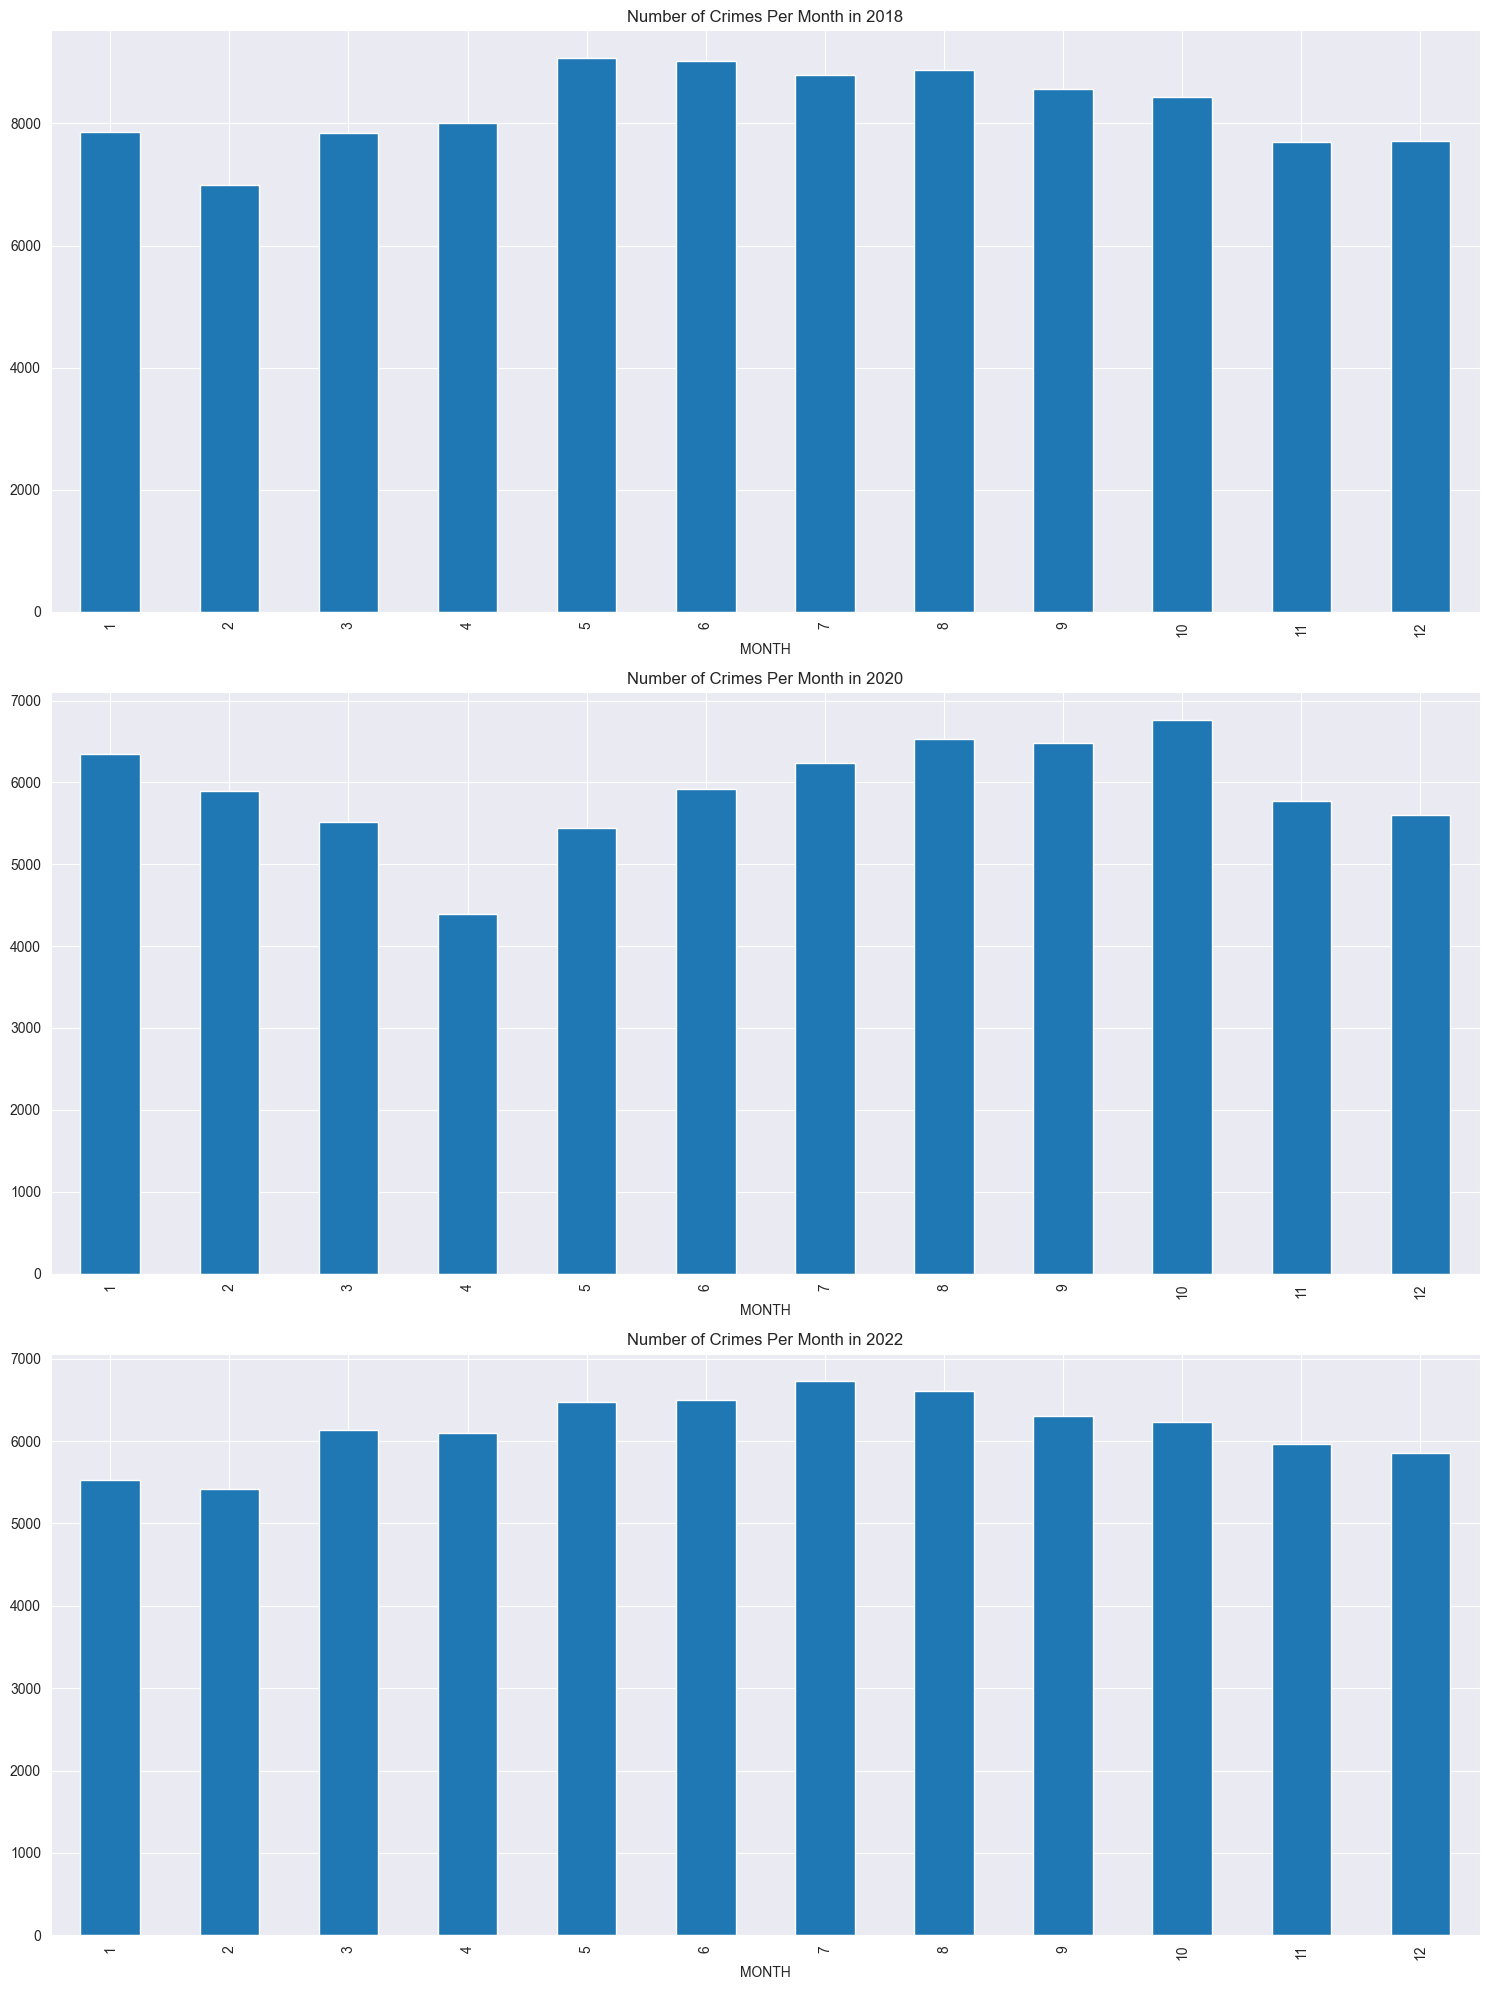

MONTH
1     7860
2     6997
3     7849
4     8004
5     9072
6     9026
7     8789
8     8871
9     8566
10    8441
11    7694
12    7719
Name: count, dtype: int64


In [12]:
fig, ax = plt.subplots(3, 1, figsize=(15, 20))

df[df['YEAR'] == 2018]['MONTH'].value_counts(sort=False).plot(kind='bar', ax=ax[0])
ax[0].set_title('Number of Crimes Per Month in 2018')

df[df['YEAR'] == 2020]['MONTH'].value_counts(sort=False).plot(kind='bar', ax=ax[1])
ax[1].set_title('Number of Crimes Per Month in 2020')

df[df['YEAR'] == 2022]['MONTH'].value_counts(sort=False).plot(kind='bar', ax=ax[2])
ax[2].set_title('Number of Crimes Per Month in 2022')

plt.tight_layout()
plt.show()

print(df[df['YEAR'] == 2018]['MONTH'].value_counts(sort=False))

In [13]:
print(df[df['YEAR'] == 2020]['MONTH'].value_counts(sort=False))

MONTH
1     6342
2     5897
3     5513
4     4387
5     5439
6     5925
7     6236
8     6533
9     6484
10    6766
11    5770
12    5602
Name: count, dtype: int64


In [14]:
print(df[df['YEAR'] == 2022]['MONTH'].value_counts(sort=False))

MONTH
1     5526
2     5418
3     6136
4     6103
5     6474
6     6500
7     6726
8     6612
9     6300
10    6235
11    5963
12    5859
Name: count, dtype: int64


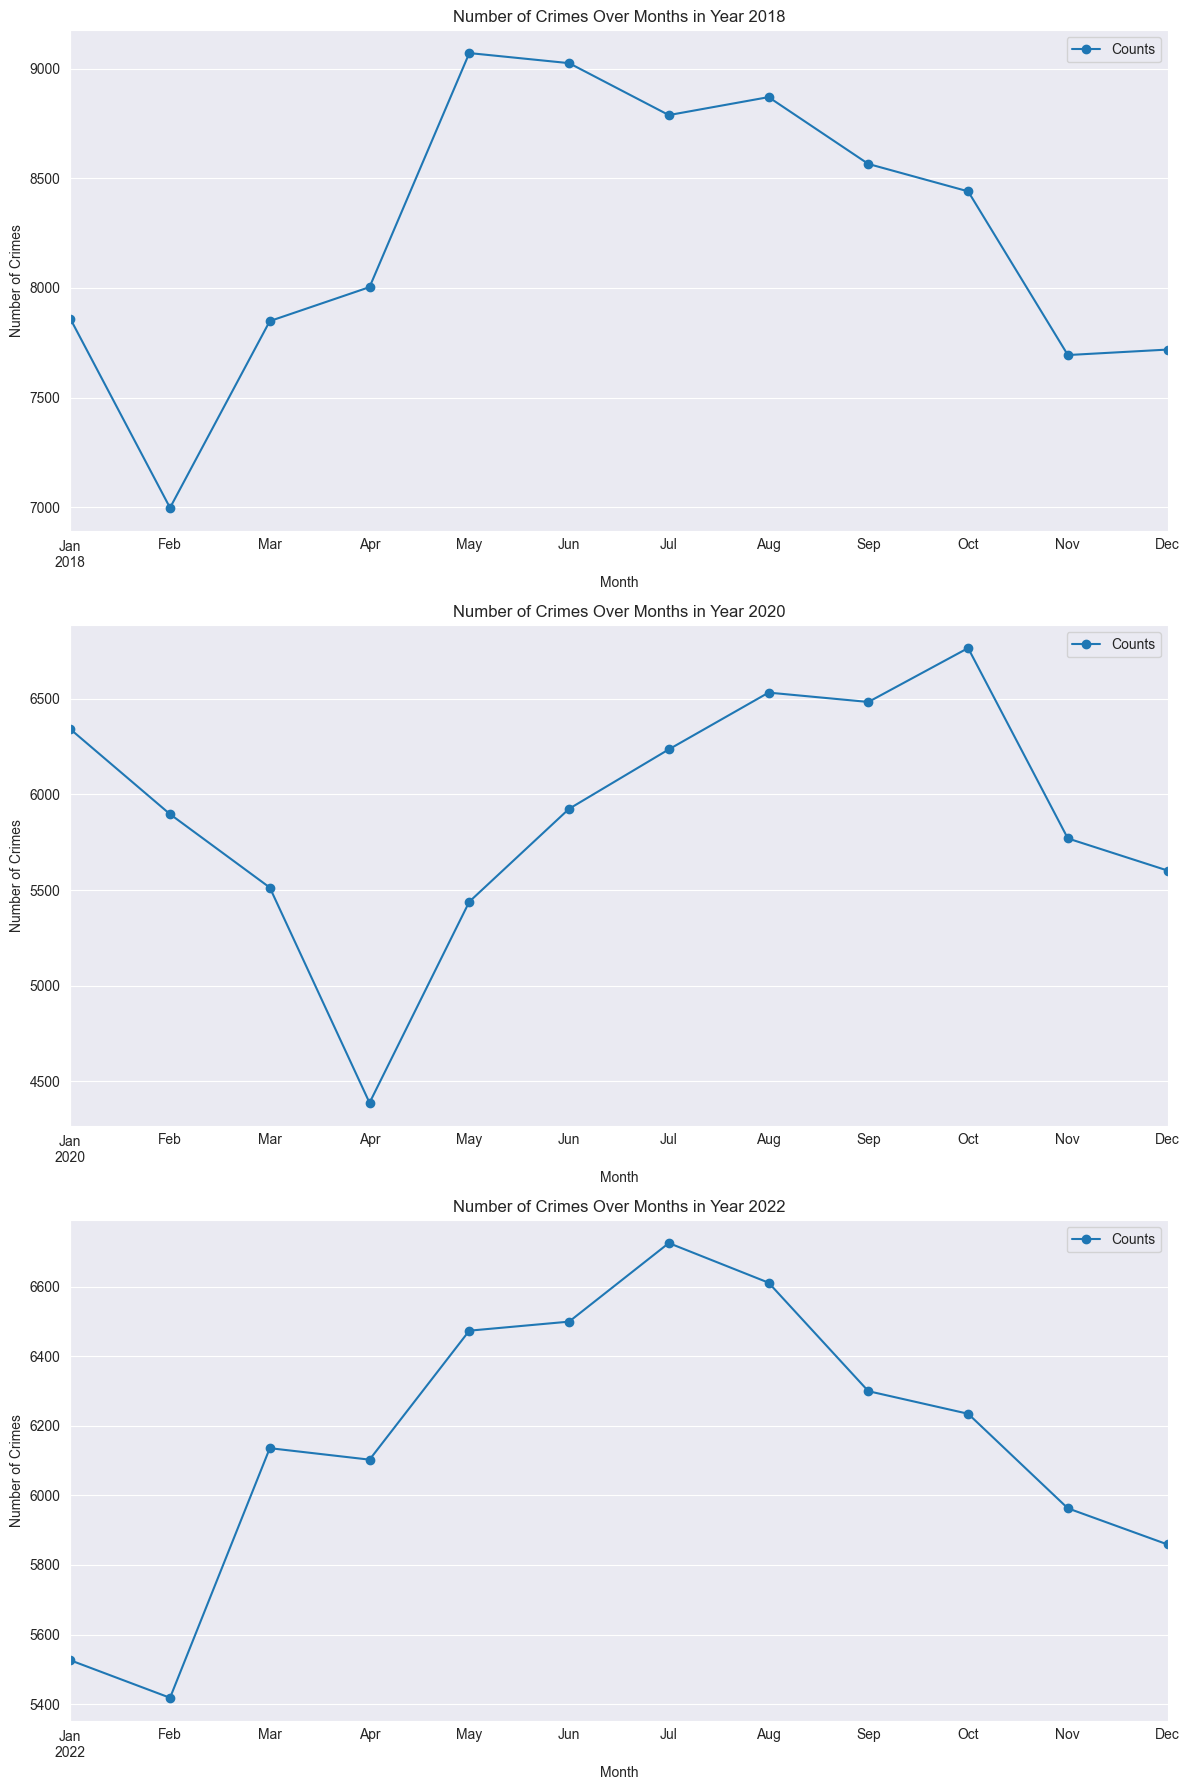

    YEAR YearMonth  Counts
0   2018   2018-01    7860
1   2018   2018-02    6997
2   2018   2018-03    7849
3   2018   2018-04    8004
4   2018   2018-05    9072
5   2018   2018-06    9026
6   2018   2018-07    8789
7   2018   2018-08    8871
8   2018   2018-09    8566
9   2018   2018-10    8441
10  2018   2018-11    7694
11  2018   2018-12    7719
12  2020   2020-01    6342
13  2020   2020-02    5897
14  2020   2020-03    5513
15  2020   2020-04    4387
16  2020   2020-05    5439
17  2020   2020-06    5925
18  2020   2020-07    6236
19  2020   2020-08    6533
20  2020   2020-09    6484
21  2020   2020-10    6766
22  2020   2020-11    5770
23  2020   2020-12    5602
24  2022   2022-01    5526
25  2022   2022-02    5418
26  2022   2022-03    6136
27  2022   2022-04    6103
28  2022   2022-05    6474
29  2022   2022-06    6500
30  2022   2022-07    6726
31  2022   2022-08    6612
32  2022   2022-09    6300
33  2022   2022-10    6235
34  2022   2022-11    5963
35  2022   2022-12    5859


In [15]:
# Convert 'OCCURRED_ON_DATE' to datetime format
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])

# Extract year and month from 'OCCURRED_ON_DATE'
df['YearMonth'] = df['OCCURRED_ON_DATE'].dt.to_period('M')

# Group by 'YearMonth' and calculate the number of crimes
crimes_by_month = df.groupby(['YEAR', 'YearMonth']).size().reset_index(name='Counts')

# Create a separate subplot for each year
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,18))

# Iterate through each year and plot the number of crimes over months
for ax, (year, group) in zip(axes, crimes_by_month.groupby('YEAR')):
    group.plot(x='YearMonth', y='Counts', ax=ax, kind='line', marker='o')
    ax.set_title(f'Number of Crimes Over Months in Year {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Crimes')

plt.tight_layout()
plt.show()

print(crimes_by_month)


We are plotting the Offense code groups but one can see in the histogram that there are too many of them and hence it is not easy to read the plots.

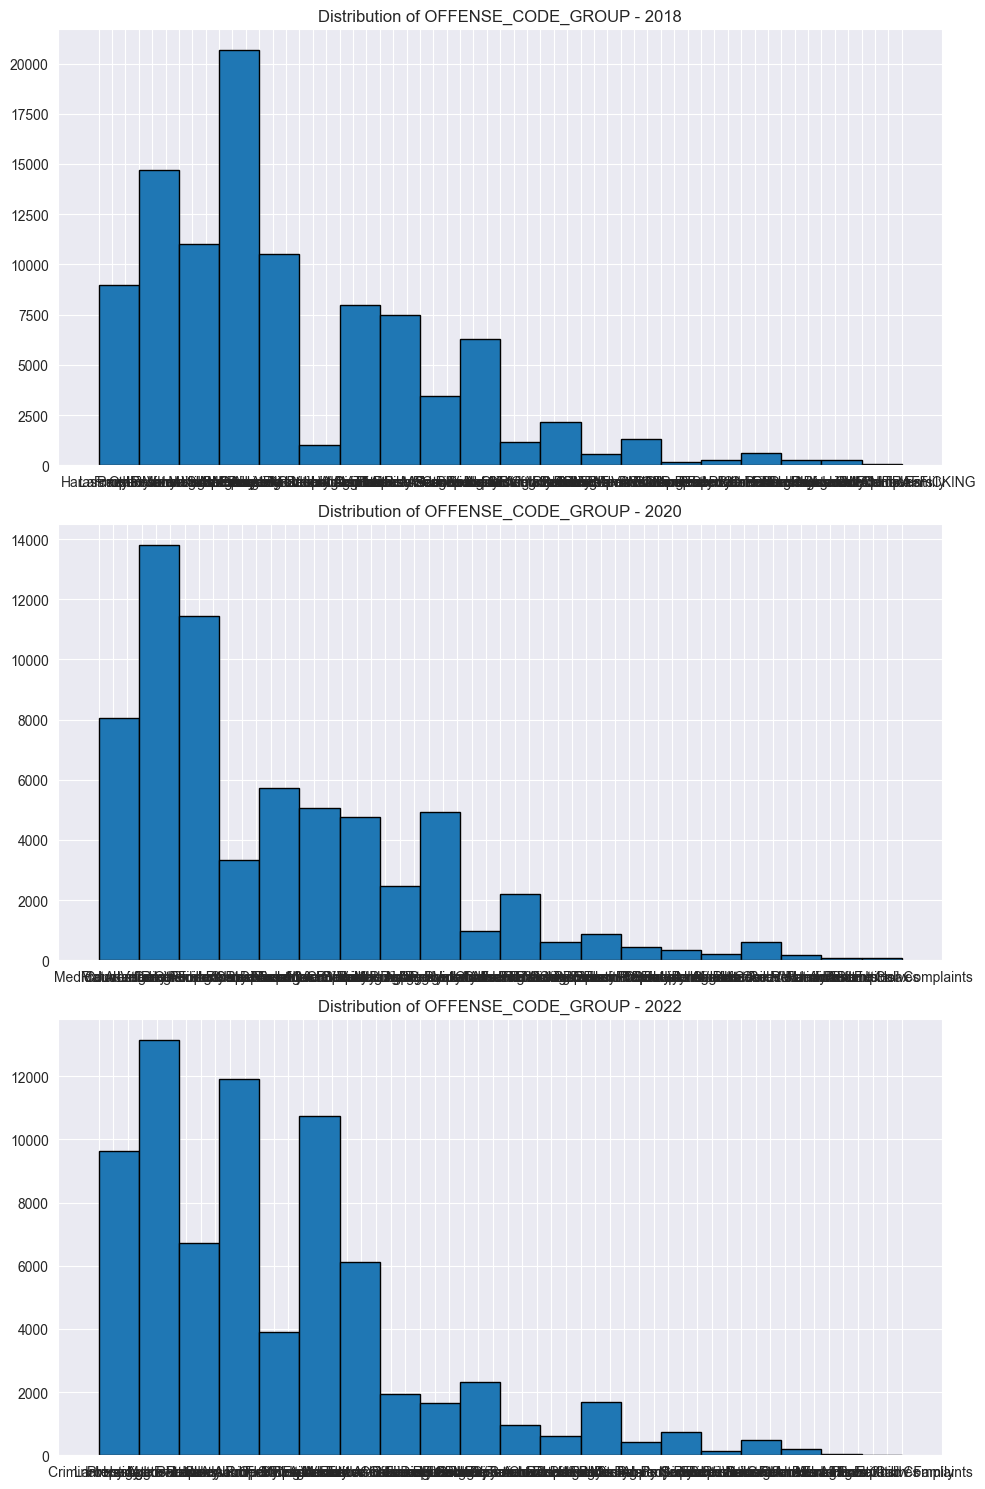

In [16]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

df[df['YEAR'] == 2018]['OFFENSE_CODE_GROUP'].hist(ax=ax[0], bins=20, edgecolor='black')
ax[0].set_title('Distribution of OFFENSE_CODE_GROUP - 2018')

df[df['YEAR'] == 2020]['OFFENSE_CODE_GROUP'].hist(ax=ax[1], bins=20, edgecolor='black')
ax[1].set_title('Distribution of OFFENSE_CODE_GROUP - 2020')

df[df['YEAR'] == 2022]['OFFENSE_CODE_GROUP'].hist(ax=ax[2], bins=20, edgecolor='black')
ax[2].set_title('Distribution of OFFENSE_CODE_GROUP - 2022')

plt.tight_layout()
plt.show()


In [17]:
num_offense_groups = df['OFFENSE_CODE_GROUP'].nunique()
print(f'There are {num_offense_groups} unique OFFENSE_CODE_GROUPs.')

There are 61 unique OFFENSE_CODE_GROUPs.


Visualize the top 10 most common 'OFFENSE_CODE_GROUP' for each year:

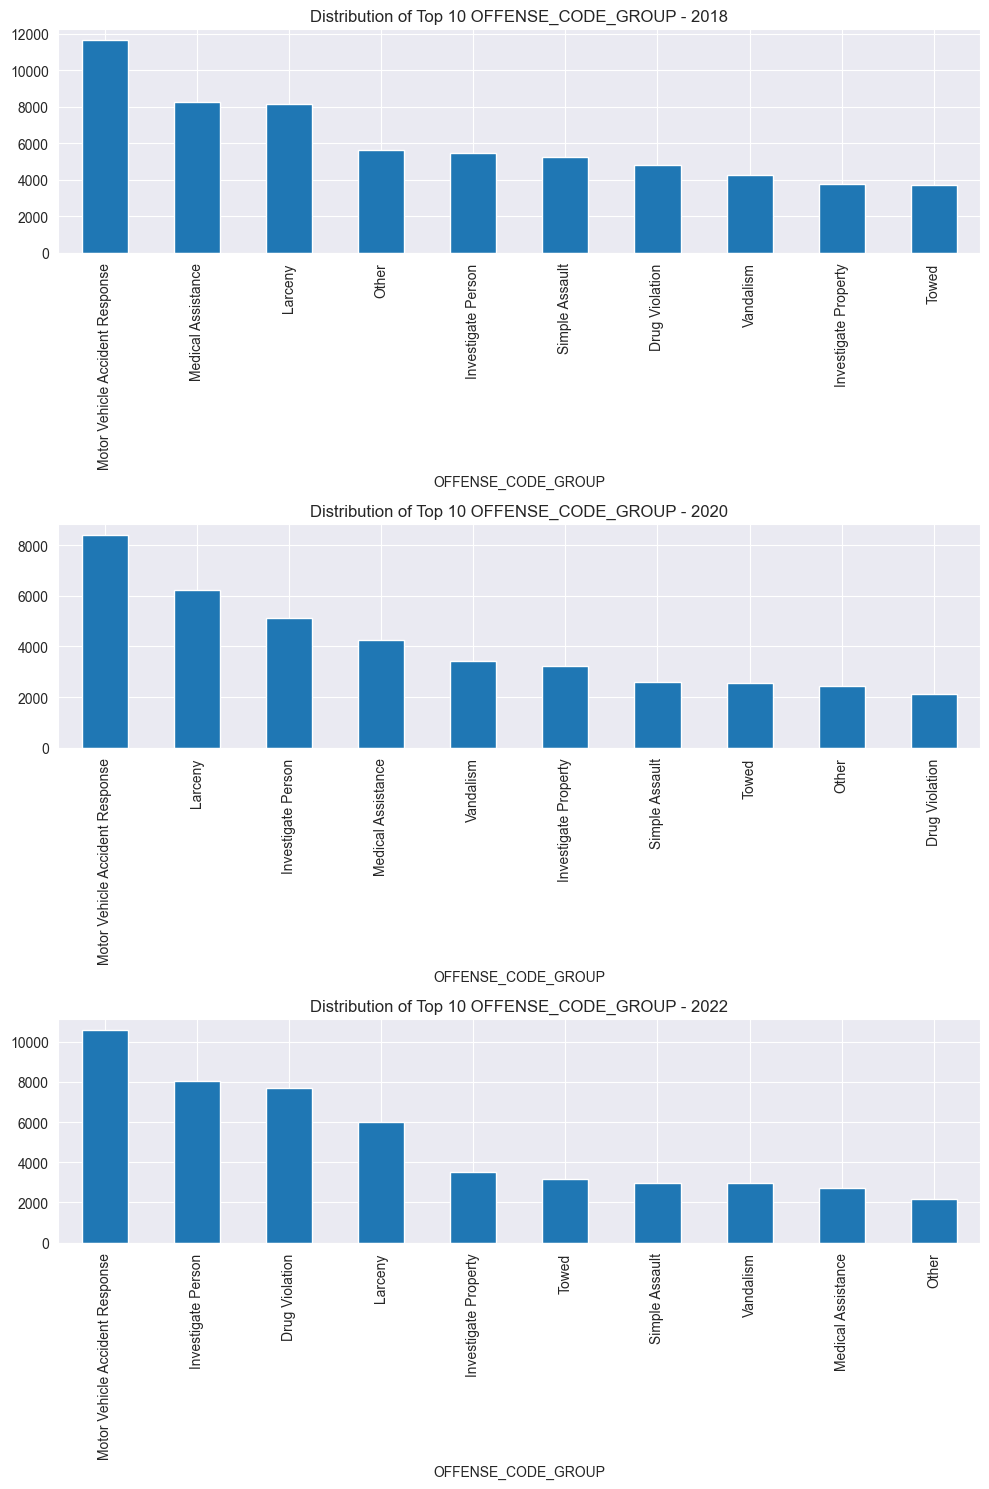

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    11647
Medical Assistance                  8257
Larceny                             8116
Other                               5600
Investigate Person                  5467
Simple Assault                      5262
Drug Violation                      4777
Vandalism                           4252
Investigate Property                3756
Towed                               3713
Name: count, dtype: int64


In [18]:
top_offense_groups = df['OFFENSE_CODE_GROUP'].value_counts().nlargest(10).index

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

df[(df['YEAR'] == 2018) & (df['OFFENSE_CODE_GROUP'].isin(top_offense_groups))]['OFFENSE_CODE_GROUP'].value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title('Distribution of Top 10 OFFENSE_CODE_GROUP - 2018')

df[(df['YEAR'] == 2020) & (df['OFFENSE_CODE_GROUP'].isin(top_offense_groups))]['OFFENSE_CODE_GROUP'].value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title('Distribution of Top 10 OFFENSE_CODE_GROUP - 2020')

df[(df['YEAR'] == 2022) & (df['OFFENSE_CODE_GROUP'].isin(top_offense_groups))]['OFFENSE_CODE_GROUP'].value_counts().plot(kind='bar', ax=ax[2])
ax[2].set_title('Distribution of Top 10 OFFENSE_CODE_GROUP - 2022')

plt.tight_layout()
plt.show()

print(df[(df['YEAR'] == 2018) & (df['OFFENSE_CODE_GROUP'].isin(top_offense_groups))]['OFFENSE_CODE_GROUP'].value_counts())

In [19]:
print(df[(df['YEAR'] == 2020) & (df['OFFENSE_CODE_GROUP'].isin(top_offense_groups))]['OFFENSE_CODE_GROUP'].value_counts())

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    8409
Larceny                            6250
Investigate Person                 5122
Medical Assistance                 4256
Vandalism                          3420
Investigate Property               3222
Simple Assault                     2607
Towed                              2552
Other                              2426
Drug Violation                     2118
Name: count, dtype: int64


In [20]:
print(df[(df['YEAR'] == 2022) & (df['OFFENSE_CODE_GROUP'].isin(top_offense_groups))]['OFFENSE_CODE_GROUP'].value_counts())

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    10585
Investigate Person                  8070
Drug Violation                      7692
Larceny                             6024
Investigate Property                3539
Towed                               3190
Simple Assault                      2972
Vandalism                           2970
Medical Assistance                  2710
Other                               2155
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

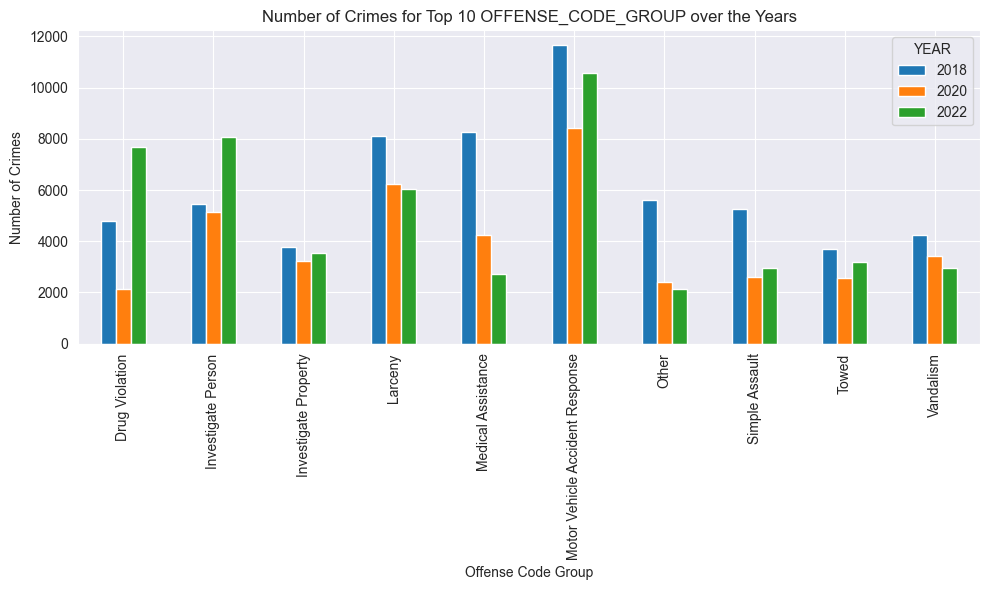

In [21]:
top_categories = df['OFFENSE_CODE_GROUP'].value_counts().nlargest(10).index
df_top_categories = df[df['OFFENSE_CODE_GROUP'].isin(top_categories)]
plt.figure(figsize=(10,6))
pd.crosstab(df_top_categories['OFFENSE_CODE_GROUP'], df_top_categories['YEAR']).plot(kind='bar', figsize=(10,6))
plt.title('Number of Crimes for Top 10 OFFENSE_CODE_GROUP over the Years')
plt.xlabel('Offense Code Group')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()


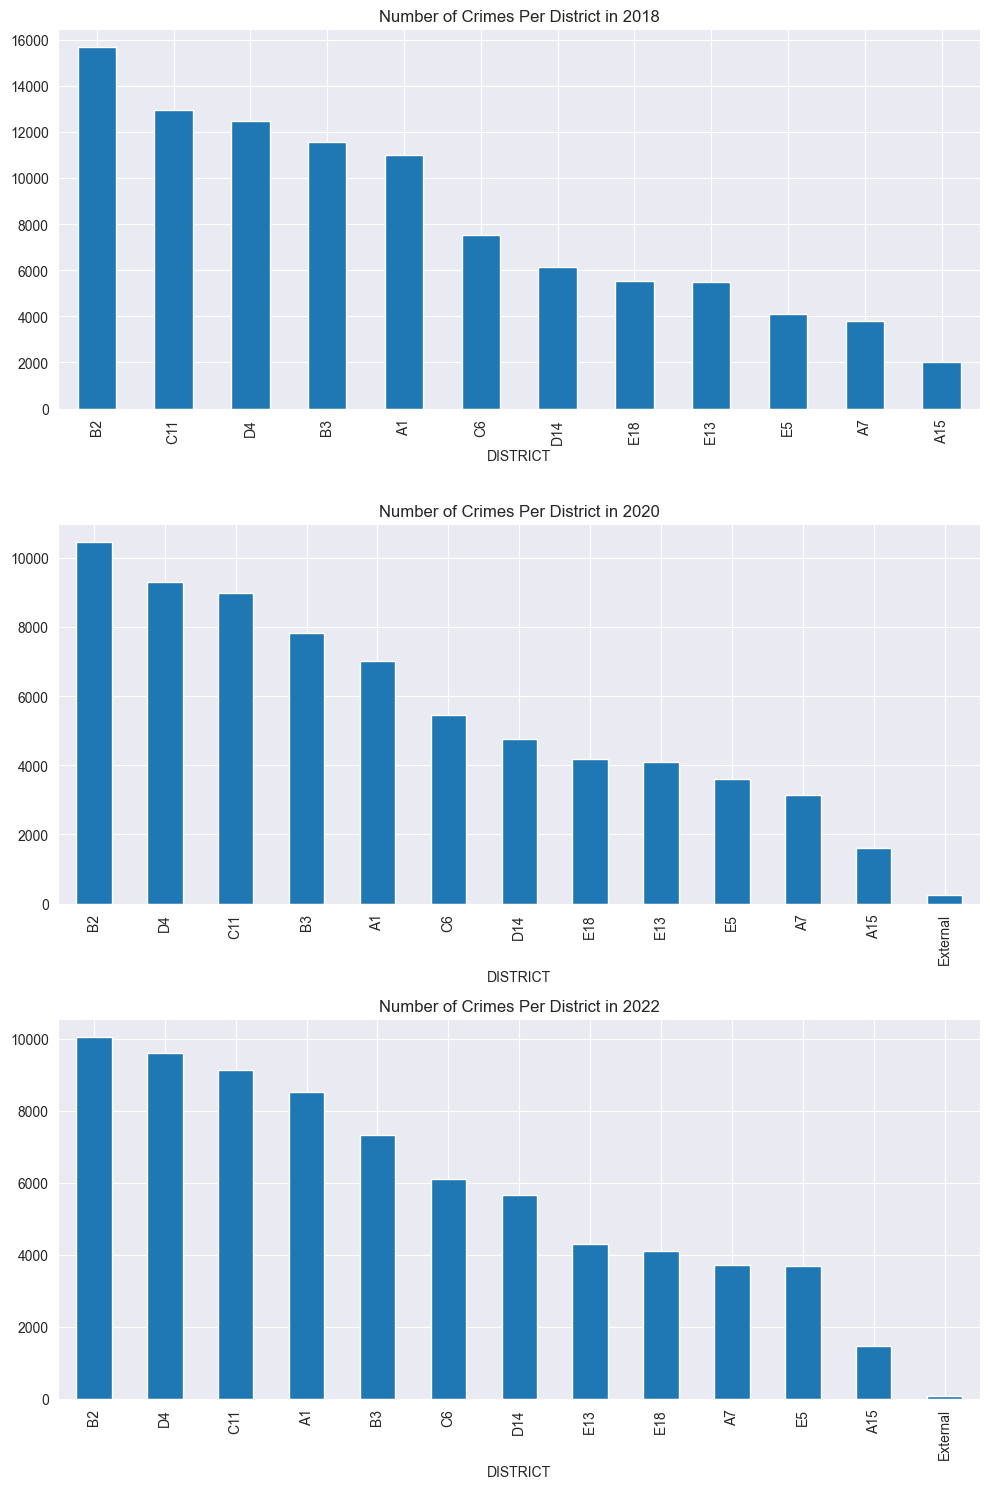

DISTRICT
B2     15658
C11    12957
D4     12454
B3     11560
A1     10976
C6      7516
D14     6159
E18     5517
E13     5480
E5      4095
A7      3800
A15     2034
Name: count, dtype: int64


In [22]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

df[df['YEAR'] == 2018]['DISTRICT'].value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title('Number of Crimes Per District in 2018')

df[df['YEAR'] == 2020]['DISTRICT'].value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title('Number of Crimes Per District in 2020')

df[df['YEAR'] == 2022]['DISTRICT'].value_counts().plot(kind='bar', ax=ax[2])
ax[2].set_title('Number of Crimes Per District in 2022')

plt.tight_layout()
plt.show()

print(df[df['YEAR'] == 2018]['DISTRICT'].value_counts())

In [23]:
print(df[df['YEAR'] == 2020]['DISTRICT'].value_counts())

DISTRICT
B2          10442
D4           9283
C11          8992
B3           7828
A1           7013
C6           5440
D14          4756
E18          4177
E13          4103
E5           3595
A7           3141
A15          1600
External      246
Name: count, dtype: int64


In [24]:
print(df[df['YEAR'] == 2022]['DISTRICT'].value_counts())

DISTRICT
B2          10031
D4           9592
C11          9136
A1           8520
B3           7316
C6           6097
D14          5654
E13          4295
E18          4109
A7           3719
E5           3682
A15          1461
External       69
Name: count, dtype: int64


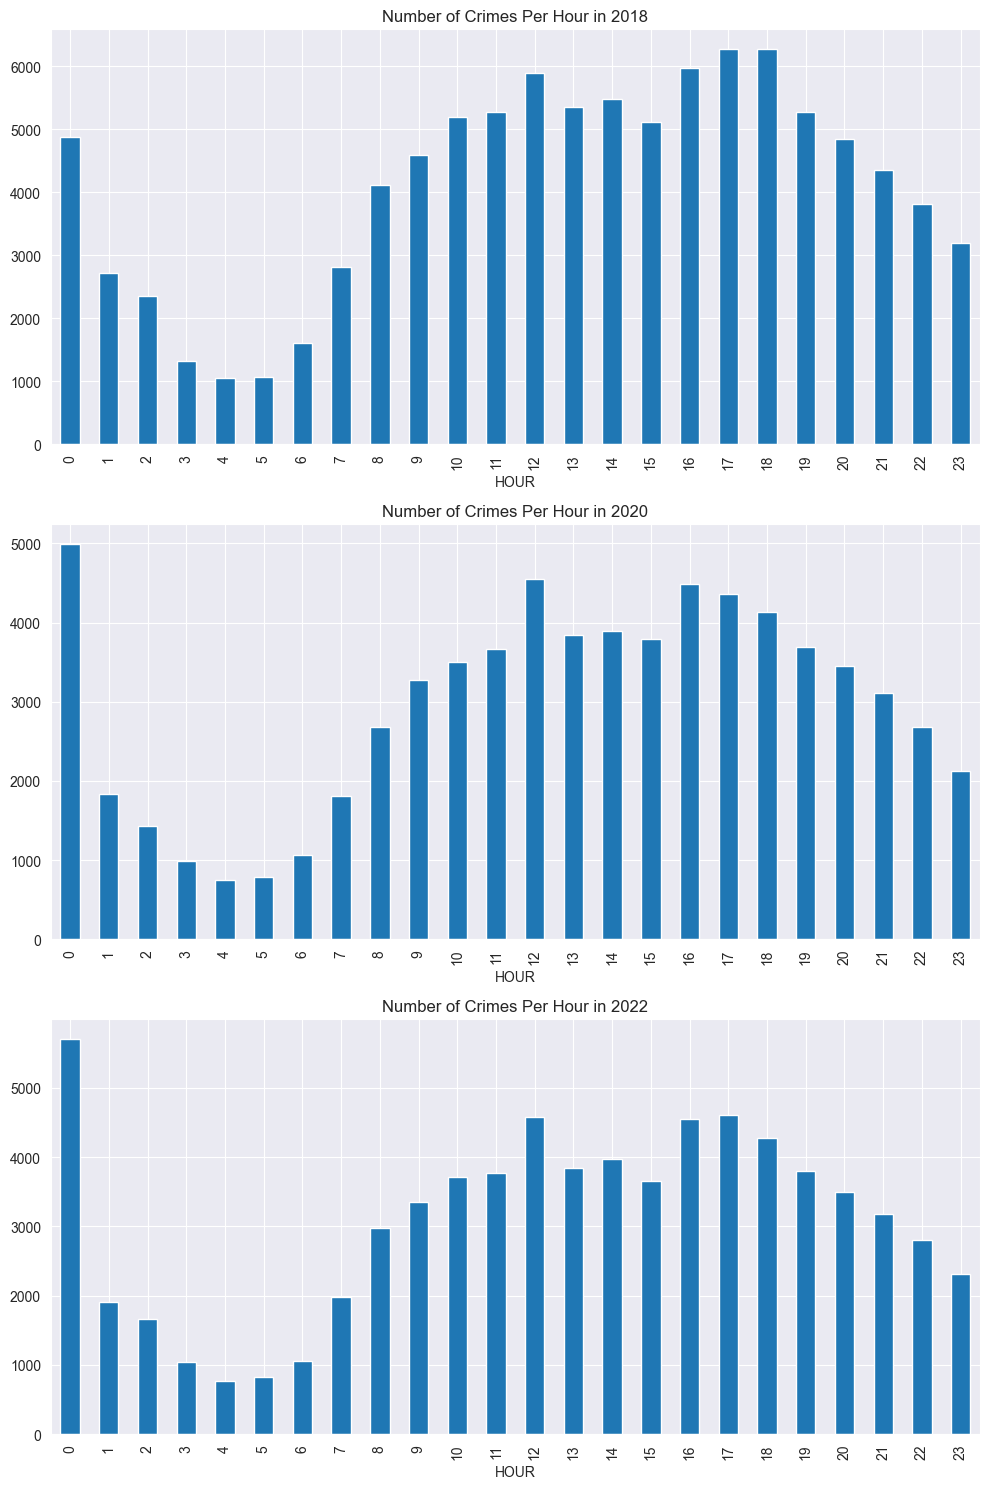

HOUR
0     4882
1     2726
2     2353
3     1329
4     1058
5     1060
6     1600
7     2817
8     4109
9     4586
10    5193
11    5274
12    5900
13    5360
14    5488
15    5123
16    5977
17    6274
18    6268
19    5279
20    4852
21    4359
22    3821
23    3200
Name: count, dtype: int64


In [25]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

df[df['YEAR'] == 2018]['HOUR'].value_counts(sort=False).plot(kind='bar', ax=ax[0])
ax[0].set_title('Number of Crimes Per Hour in 2018')

df[df['YEAR'] == 2020]['HOUR'].value_counts(sort=False).plot(kind='bar', ax=ax[1])
ax[1].set_title('Number of Crimes Per Hour in 2020')

df[df['YEAR'] == 2022]['HOUR'].value_counts(sort=False).plot(kind='bar', ax=ax[2])
ax[2].set_title('Number of Crimes Per Hour in 2022')

plt.tight_layout()
plt.show()

print(df[df['YEAR'] == 2018]['HOUR'].value_counts(sort=False))

In [26]:
df[df['YEAR'] == 2020]['HOUR'].value_counts(sort=False)

HOUR
0     4992
1     1833
2     1433
3      990
4      742
5      782
6     1059
7     1807
8     2687
9     3281
10    3500
11    3668
12    4547
13    3847
14    3888
15    3799
16    4482
17    4361
18    4135
19    3689
20    3453
21    3110
22    2686
23    2123
Name: count, dtype: int64

In [27]:
df[df['YEAR'] == 2022]['HOUR'].value_counts(sort=False)

HOUR
0     5704
1     1907
2     1663
3     1046
4      767
5      830
6     1060
7     1975
8     2980
9     3359
10    3720
11    3770
12    4579
13    3843
14    3967
15    3653
16    4548
17    4610
18    4271
19    3803
20    3493
21    3186
22    2809
23    2309
Name: count, dtype: int64

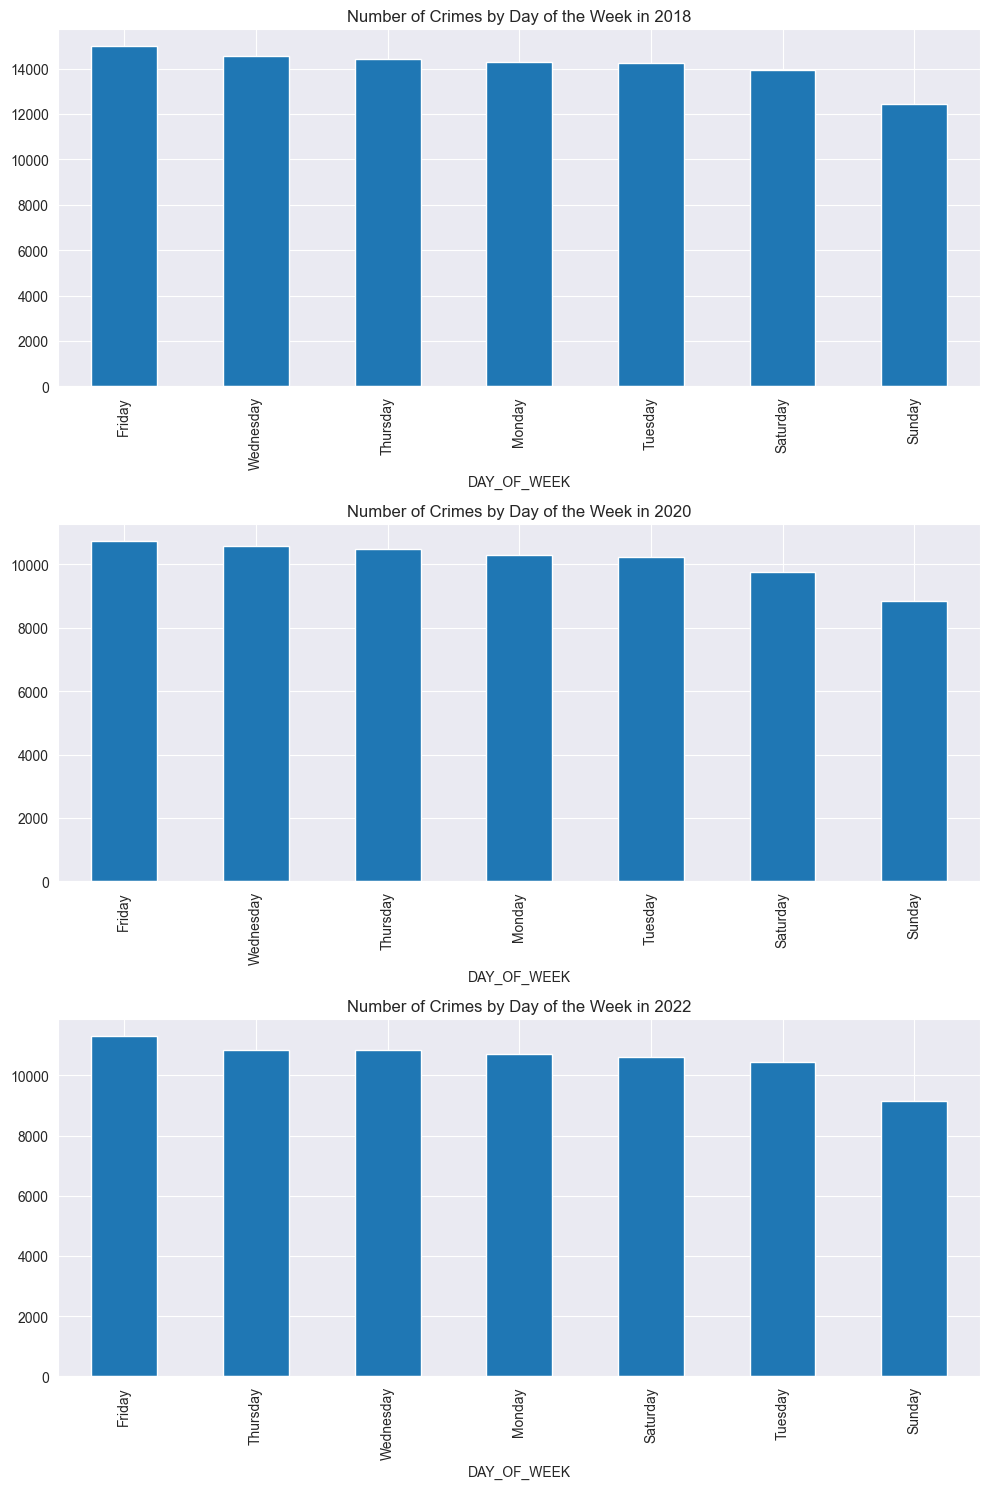

DAY_OF_WEEK
Friday       14974
Wednesday    14557
Thursday     14426
Monday       14272
Tuesday      14260
Saturday     13949
Sunday       12450
Name: count, dtype: int64


In [28]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

df[df['YEAR'] == 2018]['DAY_OF_WEEK'].value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title('Number of Crimes by Day of the Week in 2018')

df[df['YEAR'] == 2020]['DAY_OF_WEEK'].value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title('Number of Crimes by Day of the Week in 2020')

df[df['YEAR'] == 2022]['DAY_OF_WEEK'].value_counts().plot(kind='bar', ax=ax[2])
ax[2].set_title('Number of Crimes by Day of the Week in 2022')

plt.tight_layout()
plt.show()


print(df[df['YEAR'] == 2018]['DAY_OF_WEEK'].value_counts())

In [29]:
print(df[df['YEAR'] == 2020]['DAY_OF_WEEK'].value_counts())

DAY_OF_WEEK
Friday       10722
Wednesday    10563
Thursday     10491
Monday       10299
Tuesday      10217
Saturday      9753
Sunday        8849
Name: count, dtype: int64


In [30]:
print(df[df['YEAR'] == 2022]['DAY_OF_WEEK'].value_counts())

DAY_OF_WEEK
Friday       11292
Thursday     10847
Wednesday    10825
Monday       10698
Saturday     10596
Tuesday      10445
Sunday        9149
Name: count, dtype: int64


Suppose we want to investigate the following offense code groups:

    "Fraud" - Hypothesis: Might have increased due to more online transactions.
    "Residential Burglary" - Hypothesis: Might have decreased with more people staying at home.
    "Aggravated Assault" - Hypothesis: Might have changed due to social distancing measures.


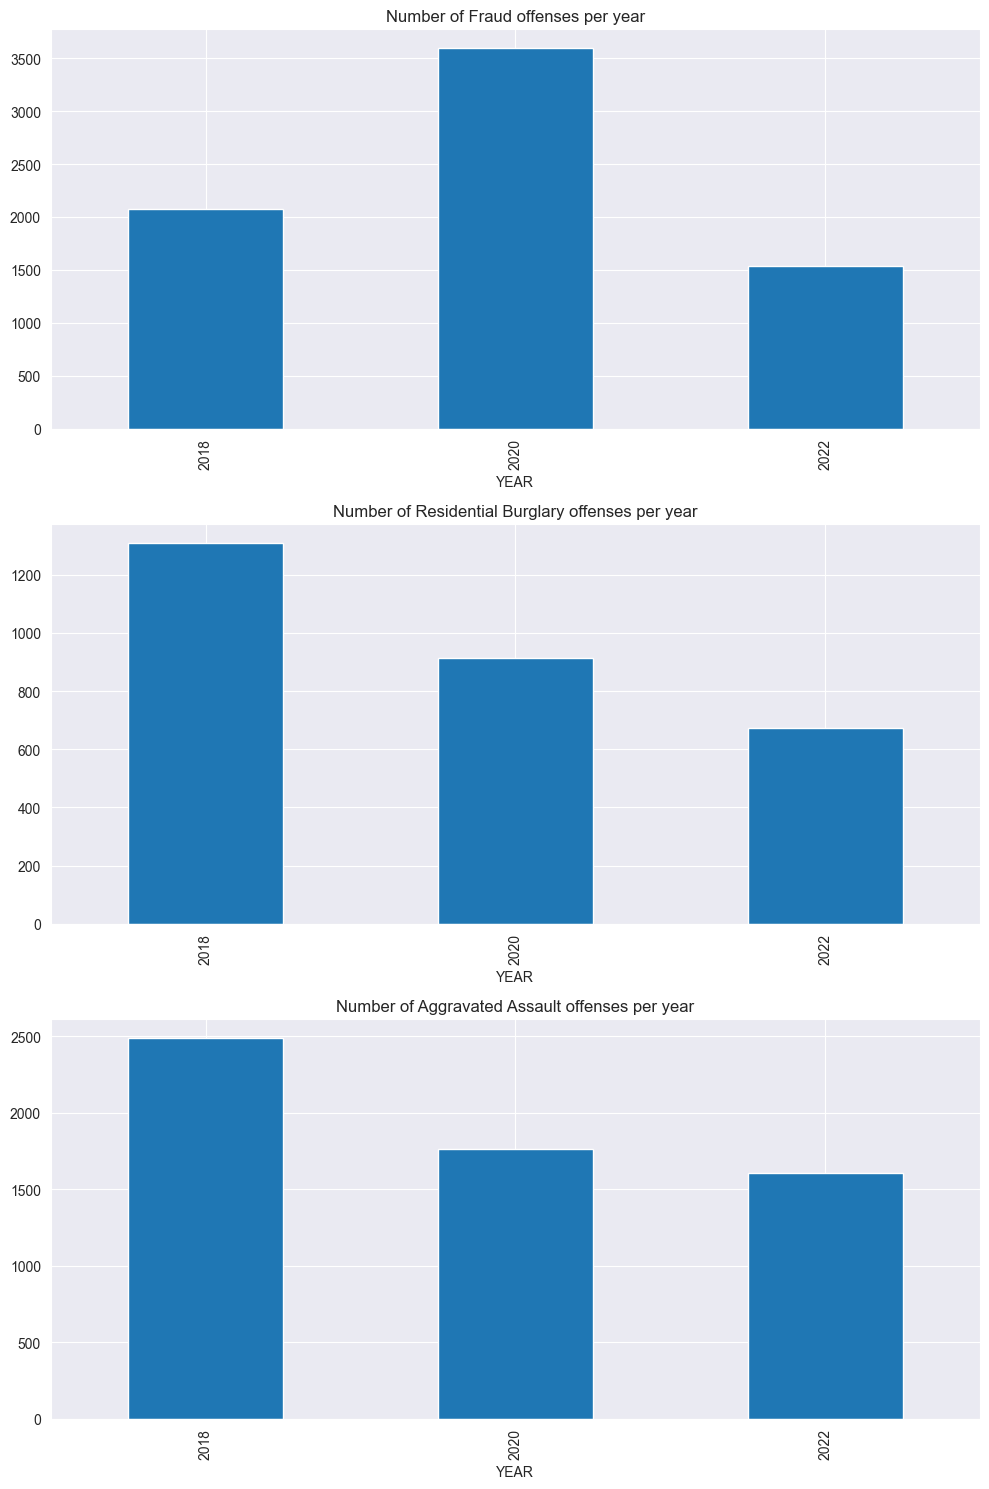


Fraud:
2018: 2077
2020: 3593
2022: 1536

Residential Burglary:
2018: 1308
2020: 915
2022: 672

Aggravated Assault:
2018: 2485
2020: 1762
2022: 1606


In [31]:
offense_groups_to_investigate = ["Fraud", "Residential Burglary", "Aggravated Assault"]

# Filter the dataframe to include only rows with our offense groups of interest
df_investigate = df[df['OFFENSE_CODE_GROUP'].isin(offense_groups_to_investigate)]

# Plot the number of offenses in each group for each year
fig, ax = plt.subplots(len(offense_groups_to_investigate), 1, figsize=(10, 15))

for i, offense_group in enumerate(offense_groups_to_investigate):
    df_investigate[df_investigate['OFFENSE_CODE_GROUP'] == offense_group]['YEAR'].value_counts(sort=False).plot(kind='bar', ax=ax[i])
    ax[i].set_title(f'Number of {offense_group} offenses per year')

plt.tight_layout()
plt.show()

# Create an empty dictionary to store the results
table_data = {}

# For each offense group, count the number of offenses per year
for offense_group in offense_groups_to_investigate:
    table_data[offense_group] = df_investigate[df_investigate['OFFENSE_CODE_GROUP'] == offense_group]['YEAR'].value_counts(sort=False).to_dict()

# Print the table data
for offense_group, counts in table_data.items():
    print(f'\n{offense_group}:')
    for year, count in counts.items():
        print(f'{year}: {count}')


In [32]:
offense_code_groups = df['OFFENSE_CODE_GROUP'].unique()

# Print the offense code groups
for offense in offense_code_groups:
    print(offense)

Harassment
Fraud
Other
Property Lost
Larceny
Larceny From Motor Vehicle
Vandalism
Residential Burglary
Investigate Person
Investigate Property
Simple Assault
Motor Vehicle Accident Response
Medical Assistance
License Violation
Missing Person Located
Assembly or Gathering Violations
Operating Under the Influence
Disorderly Conduct
Verbal Disputes
Auto Theft
Warrant Arrests
Towed
Aggravated Assault
Property Found
Fire Related Reports
Violations
Police Service Incidents
Drug Violation
Robbery
Commercial Burglary
Restraining Order Violations
Liquor Violation
Auto Theft Recovery
Confidence Games
Counterfeiting
Missing Person Reported
Ballistics
Search Warrants
HOME INVASION
Landlord/Tenant Disputes
Firearm Violations
Recovered Stolen Property
Arson
Evading Fare
Prostitution
Prisoner Related Incidents
Service
Embezzlement
Property Related Damage
License Plate Related Incidents
Other Burglary
Aircraft
Criminal Harassment
Firearm Discovery
Harbor Related Incidents
Homicide
Offenses Against Chi

Here are some offenses that could be interesting to investigate with Hypothesis and what we might expect

"Assembly or Gathering Violations": During the pandemic, many regions enacted laws limiting the size of gatherings to reduce the spread of the virus. You might expect to see an increase in these violations during 2020.

"Auto Theft" and "Auto Theft Recovery": With fewer people commuting daily due to work-from-home guidelines, the pattern of auto theft might have changed.

"Disorderly Conduct" and "Verbal Disputes": With increased stress and more time spent at home, these incidents might have increased.

"Drug Violation": Changes in patterns of drug violations could reflect changes in enforcement or in drug use behaviors due to the pandemic.

"Embezzlement": Economic hardship and remote work might have led to changes in this type of crime.

"HOME INVASION": With more people staying at home, you would expect this to decrease during 2020.

"Larceny" and "Larceny From Motor Vehicle": These common types of property crime could have been impacted by fewer people out in public.

"Missing Person Reported": This might have decreased as people were less likely to be traveling or going out.

"Violations": General violations might have been impacted by the pandemic and related changes in law enforcement

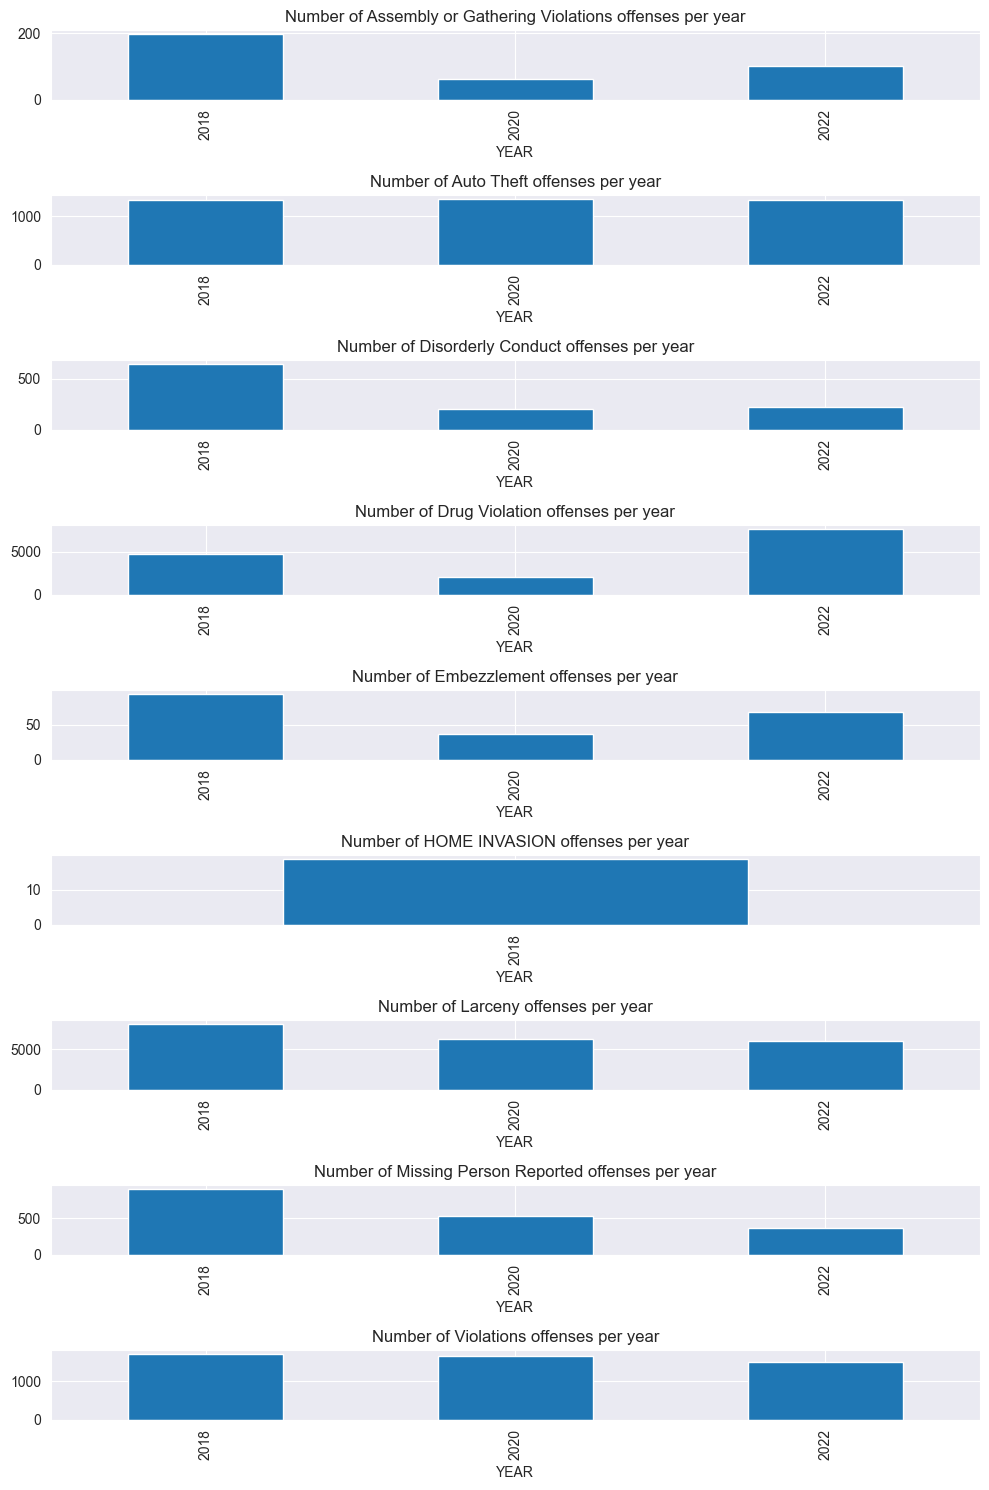


Assembly or Gathering Violations:
2018: 199
2020: 61
2022: 102

Auto Theft:
2018: 1340
2020: 1362
2022: 1328

Disorderly Conduct:
2018: 647
2020: 199
2022: 222

Drug Violation:
2018: 4777
2020: 2118
2022: 7692

Embezzlement:
2018: 94
2020: 37
2022: 68

HOME INVASION:
2018: 19

Larceny:
2018: 8116
2020: 6250
2022: 6024

Missing Person Reported:
2018: 899
2020: 527
2022: 363

Violations:
2018: 1705
2020: 1634
2022: 1495


In [33]:
offense_groups_to_investigate = ["Assembly or Gathering Violations", "Auto Theft", "Disorderly Conduct", "Drug Violation", "Embezzlement", "HOME INVASION", "Larceny", "Missing Person Reported", "Violations"]

df_investigate = df[df['OFFENSE_CODE_GROUP'].isin(offense_groups_to_investigate)]

fig, ax = plt.subplots(len(offense_groups_to_investigate), 1, figsize=(10, 15))

for i, offense_group in enumerate(offense_groups_to_investigate):
    df_investigate[df_investigate['OFFENSE_CODE_GROUP'] == offense_group]['YEAR'].value_counts(sort=False).plot(kind='bar', ax=ax[i])
    ax[i].set_title(f'Number of {offense_group} offenses per year')

plt.tight_layout()
plt.show()

# Create an empty dictionary to store the results
table_data = {}

# For each offense group, count the number of offenses per year
for offense_group in offense_groups_to_investigate:
    table_data[offense_group] = df_investigate[df_investigate['OFFENSE_CODE_GROUP'] == offense_group]['YEAR'].value_counts(sort=False).to_dict()

# Print the table data
for offense_group, counts in table_data.items():
    print(f'\n{offense_group}:')
    for year, count in counts.items():
        print(f'{year}: {count}')

Correlation analysis - very basic

              OFFENSE_CODE      YEAR     MONTH      HOUR       Lat      Long
OFFENSE_CODE      1.000000  0.005820 -0.003509 -0.004010 -0.030481 -0.006160
YEAR              0.005820  1.000000  0.002664 -0.024816  0.004009 -0.003256
MONTH            -0.003509  0.002664  1.000000 -0.004417 -0.002905  0.002576
HOUR             -0.004010 -0.024816 -0.004417  1.000000 -0.002067 -0.006869
Lat              -0.030481  0.004009 -0.002905 -0.002067  1.000000 -0.892951
Long             -0.006160 -0.003256  0.002576 -0.006869 -0.892951  1.000000


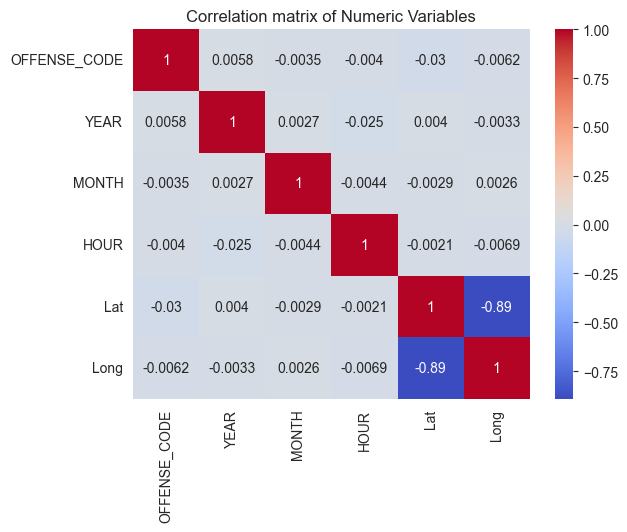

In [34]:
# Select only numeric columns for correlation
numeric_cols = ['OFFENSE_CODE', 'YEAR', 'MONTH', 'HOUR', 'Lat', 'Long']

# Calculate correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Display correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix of Numeric Variables')
plt.show()


OFFENSE_CODE and YEAR: The correlation is very low, suggesting that there is no significant linear relationship between the type of crime and the year.

YEAR and HOUR: The negative correlation is also very low, implying that the time of the day when a crime occurs doesn't change significantly over the years.

MONTH and HOUR: Again, the correlation is close to zero, suggesting that the time of the day when a crime occurs doesn't change significantly over months.

Lat and Long: The correlation is highly negative (-0.89), which makes sense because in most geographic coordinate systems, latitude and longitude are inversely related (as you move north, longitude decreases, and vice versa).

It's important to note that these correlations are only indicative of linear relationships. If the relationship between variables is nonlinear, this won't be reflected in the correlation.

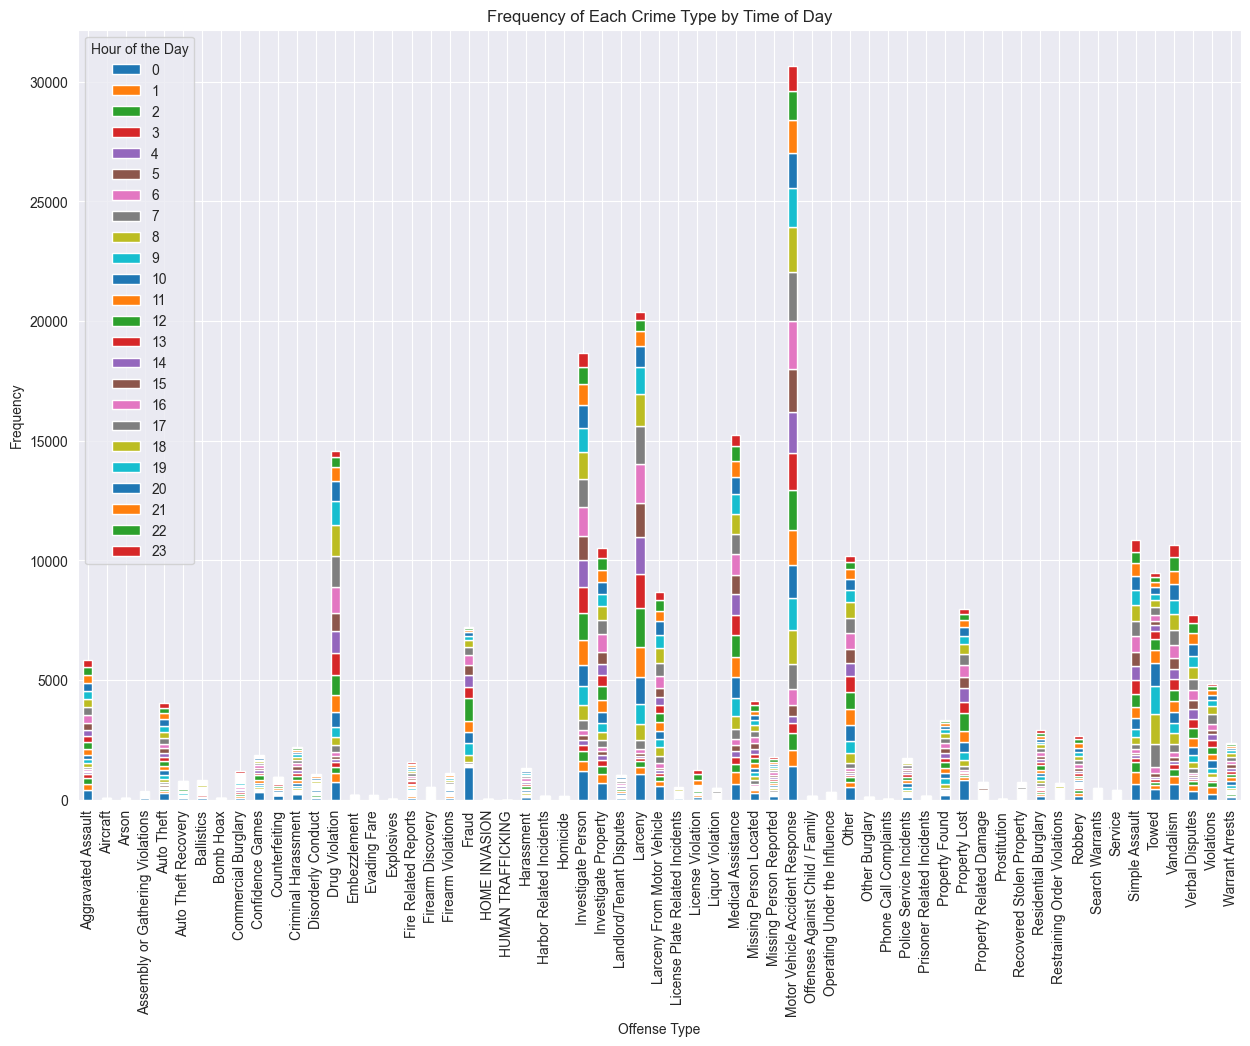

In [35]:
df.groupby(['OFFENSE_CODE_GROUP', 'HOUR']).size().unstack().plot(kind='bar', stacked=True, figsize=(15,10))
plt.title('Frequency of Each Crime Type by Time of Day')
plt.xlabel('Offense Type')
plt.ylabel('Frequency')
plt.legend(title='Hour of the Day')
plt.show()

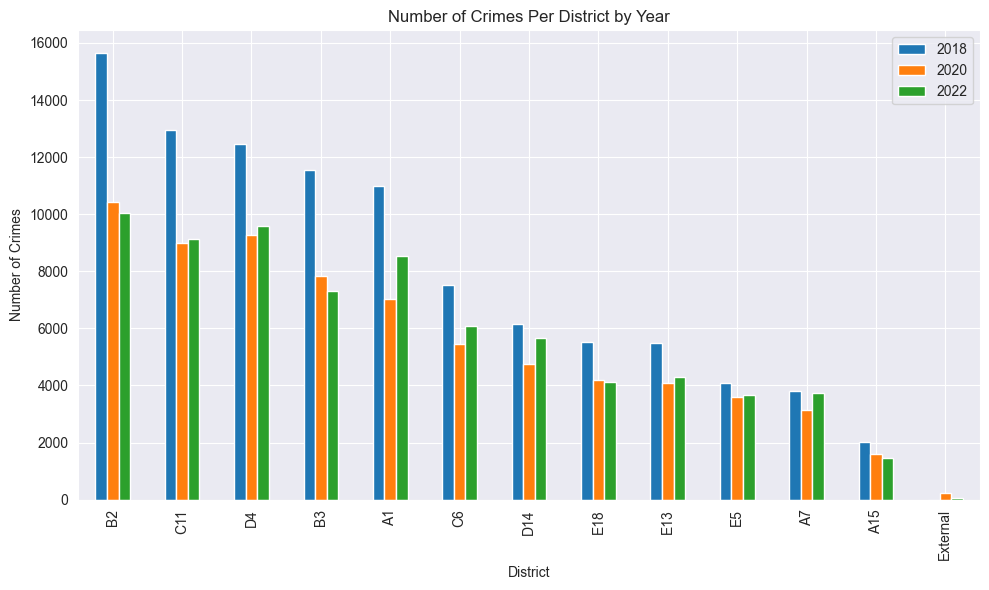

In [37]:
district_comparison_2018 = df[df['YEAR'] == 2018]['DISTRICT'].value_counts()
district_comparison_2020 = df[df['YEAR'] == 2020]['DISTRICT'].value_counts()
district_comparison_2022 = df[df['YEAR'] == 2022]['DISTRICT'].value_counts()

district_comparison = pd.concat([district_comparison_2018, district_comparison_2020, district_comparison_2022], axis=1)
district_comparison.columns = ['2018', '2020', '2022']
district_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Crimes Per District by Year')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()


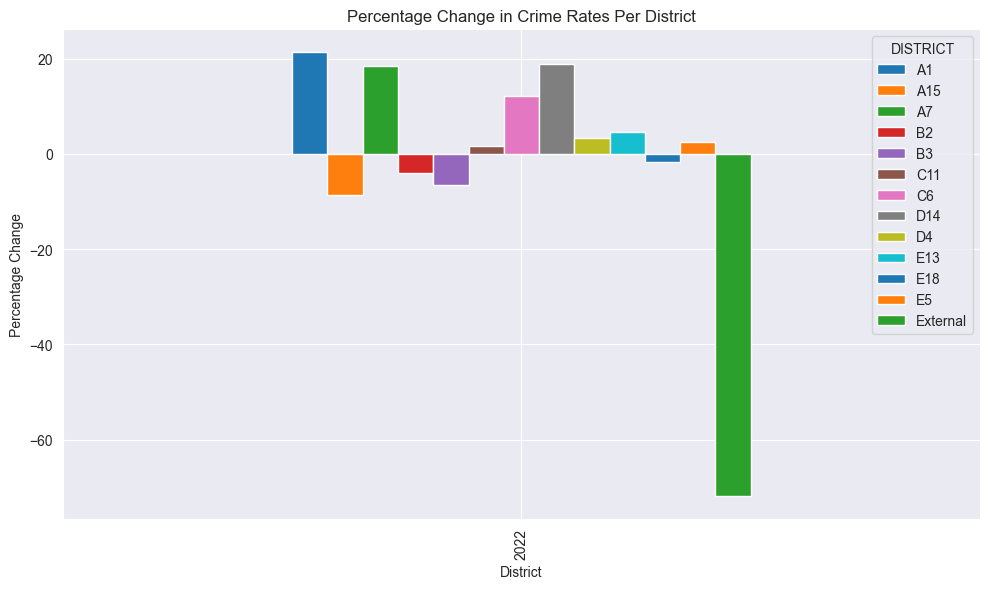

In [38]:
district_crime_counts = df.groupby(['YEAR', 'DISTRICT']).size().unstack()
percentage_change = district_crime_counts.pct_change().mul(100).round(2)
percentage_change.dropna().plot(kind='bar', figsize=(10, 6))
plt.title('Percentage Change in Crime Rates Per District')
plt.xlabel('District')
plt.ylabel('Percentage Change')
plt.tight_layout()
plt.show()


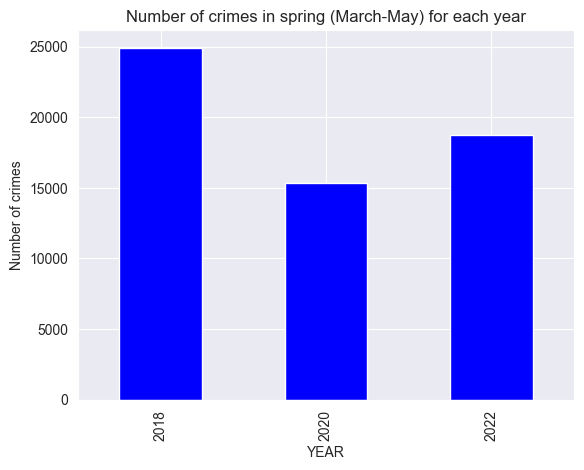

In [39]:
# Extract spring crimes for each year
spring_crimes = df[df['MONTH'].isin([3, 4, 5])].groupby('YEAR').size()

# Plot a bar chart
spring_crimes.plot(kind='bar', color='blue')
plt.ylabel('Number of crimes')
plt.title('Number of crimes in spring (March-May) for each year')
plt.show()


In [40]:
reasonable_lat_range_boston = (42.23, 42.40)  # these are approximate latitudinal bounds for Boston
reasonable_long_range_boston = (-71.19, -70.92)  # these are approximate longitudinal bounds for Boston

df = df.loc[(df['Lat'].between(*reasonable_lat_range_boston)) & (df['Long'].between(*reasonable_long_range_boston))]

# Now check the data again
print(df[df['YEAR'] == 2020][['Lat', 'Long']].describe())


                Lat          Long
count  69146.000000  69146.000000
mean      42.321771    -71.084139
std        0.032195      0.031164
min       42.232656    -71.178674
25%       42.297555    -71.099389
50%       42.326966    -71.077788
75%       42.347671    -71.060932
max       42.395042    -70.953726


In [41]:
# Remove rows with missing values in 'Lat' or 'Long'
df = df.dropna(subset=['Lat', 'Long'])

# Check if there are still any missing values in these columns
assert df['Lat'].isnull().sum() == 0
assert df['Long'].isnull().sum() == 0

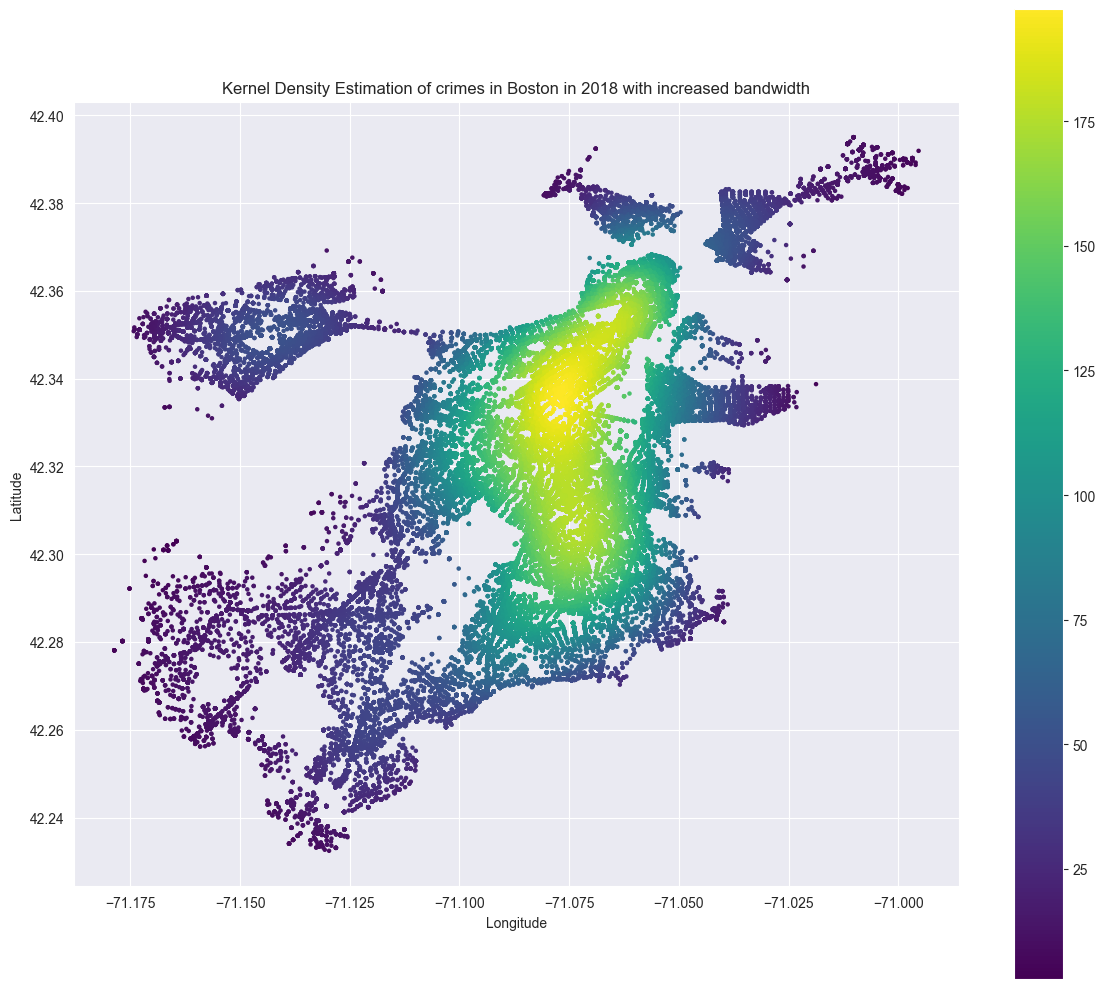

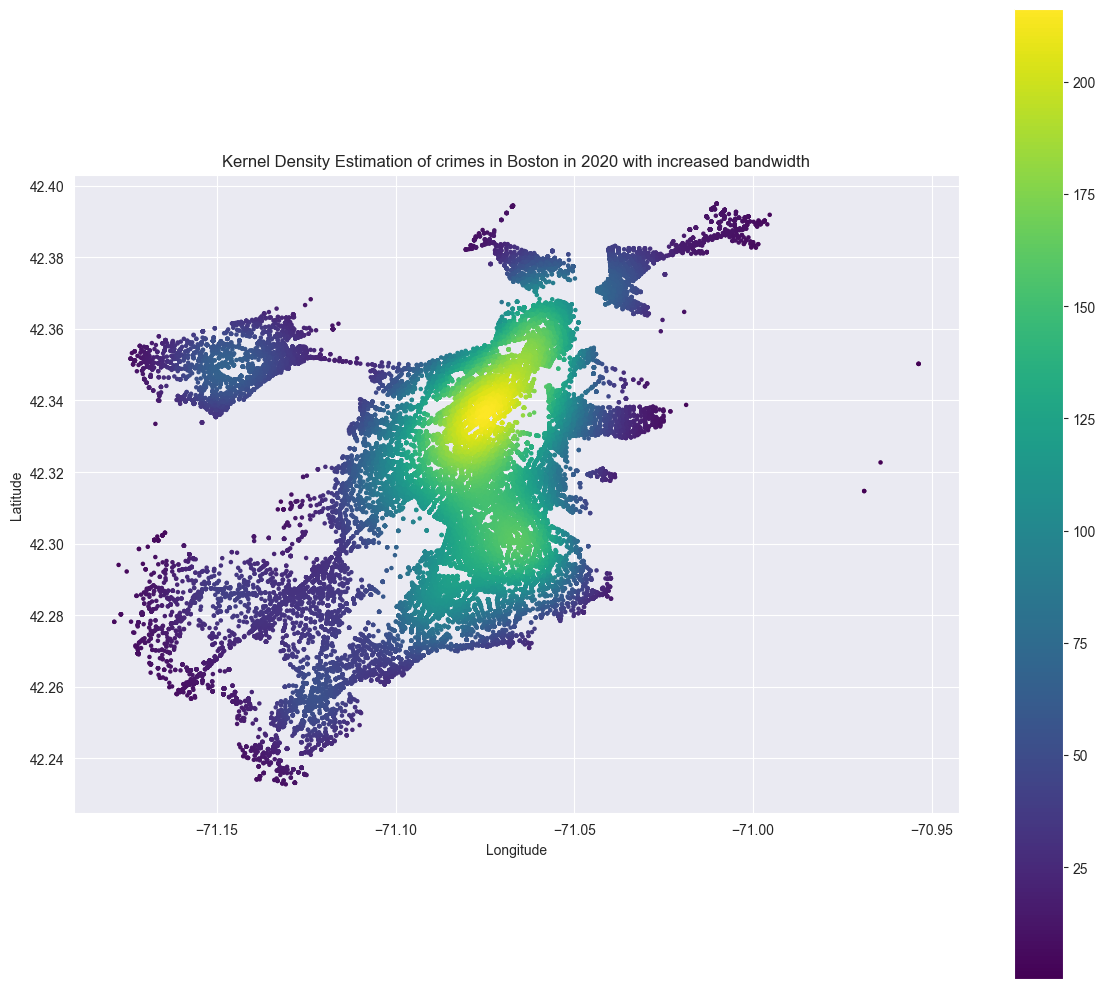

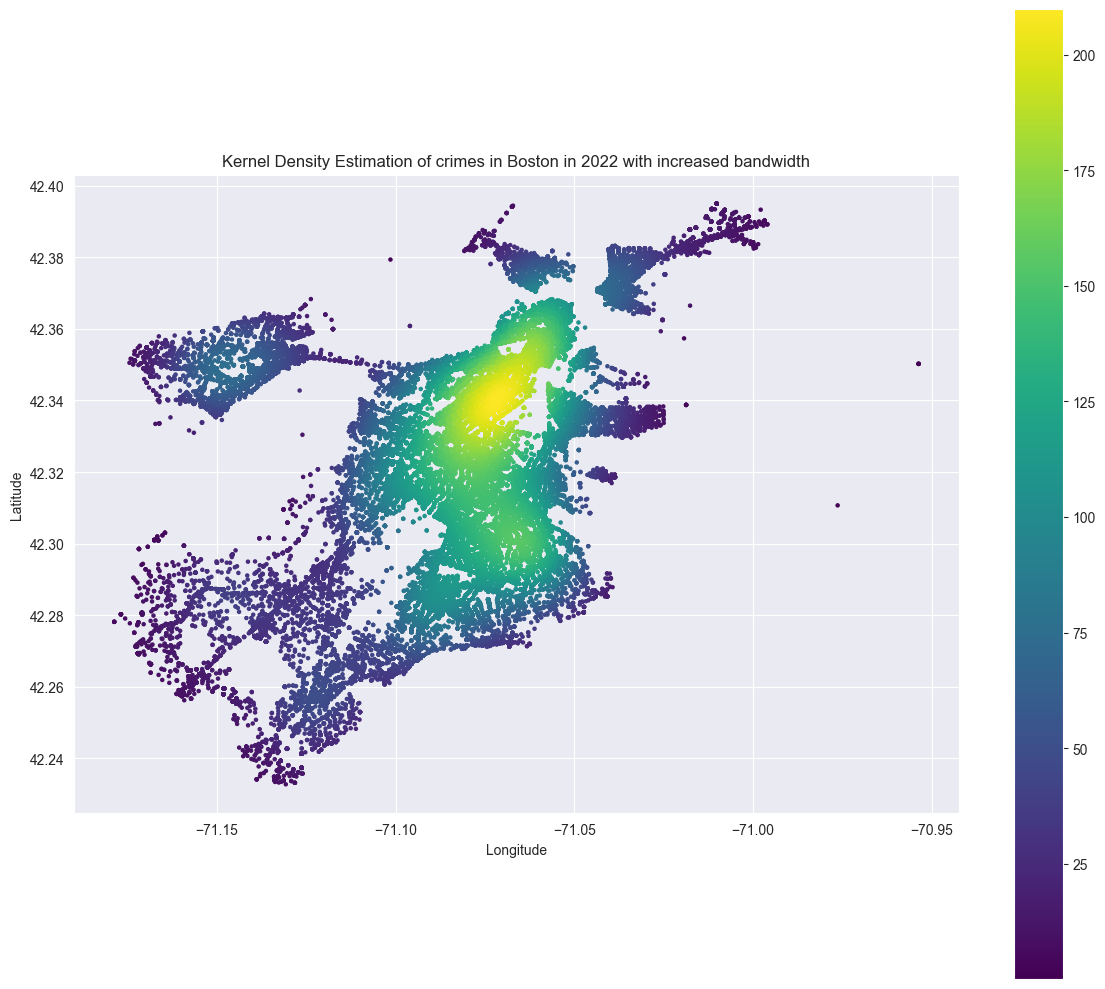

In [42]:
from sklearn.neighbors import KernelDensity

# Create a geopandas GeoDataFrame from the pandas DataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Long, df.Lat))

for year in [2018, 2020, 2022]:
    X_year = np.vstack(gdf[gdf['YEAR'] == year][['Long', 'Lat']].values)
    kde = KernelDensity(bandwidth=0.01, kernel='gaussian')
    kde.fit(X_year)
    z = kde.score_samples(X_year)
    gdf_year = gdf[gdf['YEAR'] == year].copy()
    gdf_year['density'] = np.exp(z)

    fig, ax = plt.subplots(figsize=(12, 10))
    gdf_year.plot(ax=ax, column='density', cmap='viridis', markersize=5, legend=True)
    plt.title(f'Kernel Density Estimation of crimes in Boston in {year} with increased bandwidth')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.show()


<Figure size 1000x1000 with 0 Axes>

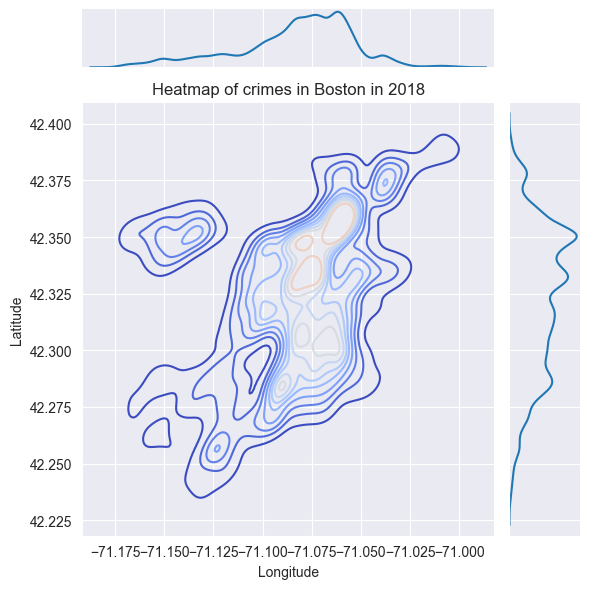

<Figure size 1000x1000 with 0 Axes>

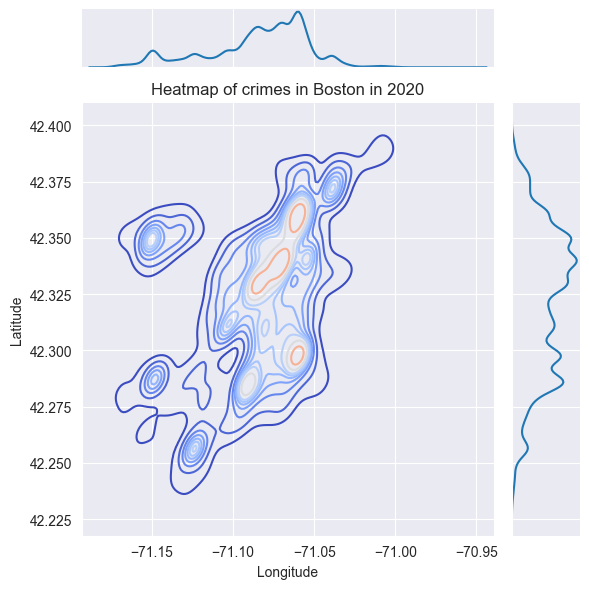

<Figure size 1000x1000 with 0 Axes>

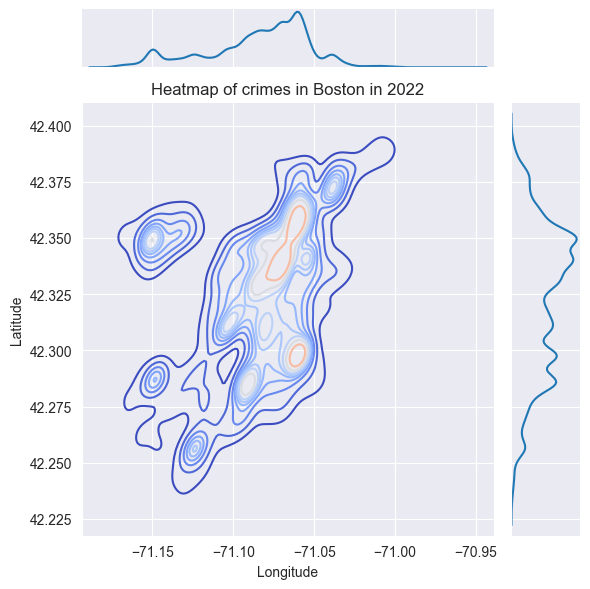

In [43]:
import seaborn as sns

for year in [2018, 2020, 2022]:
    gdf_year = gdf[gdf['YEAR'] == year]
    plt.figure(figsize=(10,10))
    sns.jointplot(x=gdf_year["Long"], y=gdf_year["Lat"], kind='kde', cmap="coolwarm")
    plt.title(f'Heatmap of crimes in Boston in {year}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.show()


In [44]:
import folium
from folium.plugins import MarkerCluster

for year in [2018, 2020, 2022]:
    gdf_year = gdf[gdf['YEAR'] == year]
    map_boston = folium.Map(location=[42.3601, -71.0589], zoom_start=13) # Boston's coordinates

    # Ensure data is in correct format
    marker_data = [[row['Lat'],row['Long']] for index, row in gdf_year.iterrows()]

    # Create a Marker Cluster and add it to the map
    marker_cluster = MarkerCluster().add_to(map_boston)
    for point in range(len(marker_data)):
        folium.Marker(location=marker_data[point]).add_to(marker_cluster)

    # Show the map
    map_boston.save(f'marker_cluster_{year}.html')


In [45]:
import geopandas as gpd
from folium.plugins import MarkerCluster

# Load GeoJSON file that defines the neighborhoods
neighborhoods = gpd.read_file('Boston_Neighborhoods.geojson')

# Add a prefix to the columns of the neighborhoods dataframe
neighborhoods.columns = ['neighborhoods_' + str(col) for col in neighborhoods.columns]

# Set the geometry column of the neighborhoods data
neighborhoods = neighborhoods.set_geometry('neighborhoods_geometry')

# Reset indices
neighborhoods.reset_index(drop=True, inplace=True)
gdf.reset_index(drop=True, inplace=True)

# Renaming the 'index_right' and 'index_left' columns
gdf.columns = ['index_right_gdf_1' if x=='index_right_gdf' else x for x in gdf.columns]
gdf.columns = ['index_right_gdf_2' if x=='index_right_gdf' else x for x in gdf.columns]
gdf.columns = ['index_right_1' if x=='index_right' else x for x in gdf.columns]
gdf.columns = ['index_left_gdf_1' if x=='index_left_gdf' else x for x in gdf.columns]
gdf.columns = ['index_left_gdf_2' if x=='index_left_gdf' else x for x in gdf.columns]
gdf.columns = ['index_left_1' if x=='index_left' else x for x in gdf.columns]

# Perform a spatial join to assign each crime to a neighborhood
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.Long, gdf.Lat))
gdf = gpd.sjoin(gdf, neighborhoods, how='left', op='within')

for year in [2018, 2020, 2022]:
    gdf_year = gdf[gdf['YEAR'] == year]

    map_boston = folium.Map(location=[42.3601, -71.0589], zoom_start=13) # Boston's coordinates

    for neighborhood in gdf_year['neighborhoods_Name'].unique():
        # Filter data for the current neighborhood
        marker_data = [[row['Lat'], row['Long']] for index, row in gdf_year[gdf_year['neighborhoods_Name'] == neighborhood].iterrows()]

        # Create a Marker Cluster for the current neighborhood and add it to the map
        marker_cluster = MarkerCluster().add_to(map_boston)
        for point in range(len(marker_data)):
            folium.Marker(location=marker_data[point]).add_to(marker_cluster)

    # Show the map
    map_boston.save(f'marker_cluster_neighborhood{year}.html')


C:\Users\raghu\.conda\envs\Env1\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\raghu\AppData\Local\Temp\ipykernel_32196\899928548.py:27: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gdf = gpd.sjoin(gdf, neighborhoods, how='left', op='within')


In [46]:
# Group by 'neighborhoods_Name' and 'YEAR', count the number of incidents
crime_counts = gdf.groupby(['neighborhoods_Name', 'YEAR']).size().reset_index(name='count')

# Pivot the table to make it easier to read
crime_counts_pivot = crime_counts.pivot(index='neighborhoods_Name', columns='YEAR', values='count').reset_index()

# Fill NaN values with 0 (if any)
crime_counts_pivot = crime_counts_pivot.fillna(0)

# Show the table
print(crime_counts_pivot)


YEAR       neighborhoods_Name     2018     2020     2022
0                     Allston   2351.0   1433.0   1747.0
1                    Back Bay   3781.0   1991.0   2348.0
2                 Bay Village    249.0    103.0    118.0
3                 Beacon Hill    815.0    511.0    474.0
4                    Brighton   3469.0   3371.0   3824.0
5                 Charlestown   1809.0   1437.0   1401.0
6                   Chinatown    839.0    475.0    512.0
7                  Dorchester  22711.0  16634.0  16177.0
8                    Downtown   5966.0   4505.0   4287.0
9                 East Boston   3780.0   3127.0   3557.0
10                     Fenway   2803.0   1320.0   1657.0
11             Harbor Islands      0.0      6.0      5.0
12                  Hyde Park   4122.0   3432.0   3260.0
13              Jamaica Plain   4685.0   3752.0   3812.0
14           Leather District    153.0     59.0     74.0
15                   Longwood    395.0    183.0    240.0
16                   Mattapan  

In [48]:
# Assume the total area of Boston is 232.1 square kilometers (Wikipedia)
total_area = 232.1

for year in [2018, 2020, 2022]:
    total_crimes = len(gdf[gdf['YEAR'] == year])
    crime_density = total_crimes / total_area
    print(f'Crime density in {year}: {crime_density} crimes per square kilometer')


Crime density in 2018: 396.9538991813873 crimes per square kilometer
Crime density in 2020: 297.914691943128 crimes per square kilometer
Crime density in 2022: 301.77940542869453 crimes per square kilometer
